In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs).all()
print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


[('2010-01-01', 'USC00519397', 0.08, 65.0), ('2010-01-02', 'USC00519397', 0.0, 63.0), ('2010-01-03', 'USC00519397', 0.0, 74.0), ('2010-01-04', 'USC00519397', 0.0, 76.0), ('2010-01-06', 'USC00519397', None, 73.0), ('2010-01-07', 'USC00519397', 0.06, 70.0), ('2010-01-08', 'USC00519397', 0.0, 64.0), ('2010-01-09', 'USC00519397', 0.0, 68.0), ('2010-01-10', 'USC00519397', 0.0, 73.0), ('2010-01-11', 'USC00519397', 0.01, 64.0), ('2010-01-12', 'USC00519397', 0.0, 61.0), ('2010-01-14', 'USC00519397', 0.0, 66.0), ('2010-01-15', 'USC00519397', 0.0, 65.0), ('2010-01-16', 'USC00519397', 0.0, 68.0), ('2010-01-17', 'USC00519397', 0.0, 64.0), ('2010-01-18', 'USC00519397', 0.0, 72.0), ('2010-01-19', 'USC00519397', 0.0, 66.0), ('2010-01-20', 'USC00519397', 0.0, 66.0), ('2010-01-21', 'USC00519397', 0.0, 69.0), ('2010-01-22', 'USC00519397', 0.0, 67.0), ('2010-01-23', 'USC00519397', 0.0, 67.0), ('2010-01-24', 'USC00519397', 0.01, 71.0), ('2010-01-25', 'USC00519397', 0.0, 67.0), ('2010-01-26', 'USC00519397'

In [10]:
df = pd.DataFrame(results, columns=['date','station', 'precipitation', 'temp'])
df

date      station  precipitation  temp
0      2010-01-01  USC00519397           0.08  65.0
1      2010-01-02  USC00519397           0.00  63.0
2      2010-01-03  USC00519397           0.00  74.0
3      2010-01-04  USC00519397           0.00  76.0
4      2010-01-06  USC00519397            NaN  73.0
...           ...          ...            ...   ...
19545  2017-08-19  USC00516128           0.09  71.0
19546  2017-08-20  USC00516128            NaN  78.0
19547  2017-08-21  USC00516128           0.56  76.0
19548  2017-08-22  USC00516128           0.50  76.0
19549  2017-08-23  USC00516128           0.45  76.0

[19550 rows x 4 columns]

In [11]:
df.describe()

precipitation          temp
count   18103.000000  19550.000000
mean        0.160644     73.097954
std         0.468746      4.523527
min         0.000000     53.000000
25%         0.000000     70.000000
50%         0.010000     73.000000
75%         0.110000     76.000000
max        11.530000     87.000000

In [12]:
df.dtypes

date              object
station           object
precipitation    float64
temp             float64
dtype: object

In [13]:
df['date'] = df['date'].apply(pd.to_datetime)

In [14]:
df.dtypes

date             datetime64[ns]
station                  object
precipitation           float64
temp                    float64
dtype: object

In [15]:
pd.DatetimeIndex(df.date).to_period("M")

PeriodIndex(['2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01',
             '2010-01', '2010-01', '2010-01', '2010-01',
             ...
             '2017-08', '2017-08', '2017-08', '2017-08', '2017-08', '2017-08',
             '2017-08', '2017-08', '2017-08', '2017-08'],
            dtype='period[M]', name='date', length=19550, freq='M')

In [16]:
df.groupby(pd.Grouper(key='date',freq='M')).size()

date
2010-01-31    201
2010-02-28    178
2010-03-31    227
2010-04-30    226
2010-05-31    246
             ... 
2017-04-30    190
2017-05-31    174
2017-06-30    191
2017-07-31    194
2017-08-31     91
Freq: M, Length: 92, dtype: int64

In [17]:
df.groupby(
    pd.Grouper(key='date',freq='M')
)['precipitation'].apply(sum)

date
2010-01-31    19.33
2010-02-28     9.68
2010-03-31    29.12
2010-04-30    35.60
2010-05-31    20.10
              ...  
2017-04-30    54.91
2017-05-31    25.27
2017-06-30    20.52
2017-07-31    23.72
2017-08-31     5.18
Freq: M, Name: precipitation, Length: 92, dtype: float64

In [18]:
df.groupby(
    pd.Grouper(key='date',freq='M')
)['temp'].apply(min)

date
2010-01-31    56.0
2010-02-28    59.0
2010-03-31    60.0
2010-04-30    61.0
2010-05-31    65.0
              ... 
2017-04-30    58.0
2017-05-31    65.0
2017-06-30    71.0
2017-07-31    69.0
2017-08-31    70.0
Freq: M, Name: temp, Length: 92, dtype: float64

In [19]:
df.groupby(pd.Grouper(key='date',freq='M'))['temp'].describe()

count       mean       std   min   25%   50%   75%   max
date                                                                
2010-01-31  201.0  69.248756  4.604108  56.0  66.0  69.0  73.0  78.0
2010-02-28  178.0  67.398876  3.788684  59.0  65.0  67.0  70.0  76.0
2010-03-31  227.0  69.651982  3.143688  60.0  68.0  70.0  72.0  77.0
2010-04-30  226.0  71.030973  3.017566  61.0  69.0  71.0  73.0  78.0
2010-05-31  246.0  73.817073  2.820311  65.0  72.0  74.0  76.0  81.0
...           ...        ...       ...   ...   ...   ...   ...   ...
2017-04-30  190.0  73.652632  4.070200  58.0  71.0  74.0  77.0  83.0
2017-05-31  174.0  75.155172  3.509533  65.0  73.0  75.5  78.0  87.0
2017-06-30  191.0  77.219895  2.622538  71.0  75.0  77.0  79.0  83.0
2017-07-31  194.0  78.484536  2.765867  69.0  77.0  79.0  80.0  87.0
2017-08-31   91.0  78.824176  3.338640  70.0  77.0  80.0  81.0  85.0

[92 rows x 8 columns]

In [20]:
month = df.groupby(pd.Grouper(key='date',freq='M'))['precipitation'].describe()
month

count      mean       std  min  25%   50%     75%   max
date                                                               
2010-01-31  196.0  0.098622  0.315116  0.0  0.0  0.00  0.0400  2.75
2010-02-28  169.0  0.057278  0.156135  0.0  0.0  0.00  0.0200  0.87
2010-03-31  216.0  0.134815  0.285952  0.0  0.0  0.02  0.1200  2.20
2010-04-30  217.0  0.164055  0.439691  0.0  0.0  0.02  0.1200  3.99
2010-05-31  234.0  0.085897  0.183942  0.0  0.0  0.01  0.0700  1.06
...           ...       ...       ...  ...  ...   ...     ...   ...
2017-04-30  171.0  0.321111  0.702469  0.0  0.0  0.02  0.3100  6.25
2017-05-31  167.0  0.151317  0.315384  0.0  0.0  0.02  0.1250  2.17
2017-06-30  171.0  0.120000  0.217726  0.0  0.0  0.02  0.1500  1.69
2017-07-31  176.0  0.134773  0.386084  0.0  0.0  0.02  0.1125  4.00
2017-08-31   81.0  0.063951  0.126023  0.0  0.0  0.00  0.0600  0.56

[92 rows x 8 columns]

In [21]:
month.dtypes

count    float64
mean     float64
std      float64
min      float64
25%      float64
50%      float64
75%      float64
max      float64
dtype: object

# Challenge

In [22]:
month.index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
      

In [23]:
month = month.sort_index()
print(month.to_string(index=False))

 count      mean       std  min   25%    50%     75%    max
 196.0  0.098622  0.315116  0.0  0.00  0.000  0.0400   2.75
 169.0  0.057278  0.156135  0.0  0.00  0.000  0.0200   0.87
 216.0  0.134815  0.285952  0.0  0.00  0.020  0.1200   2.20
 217.0  0.164055  0.439691  0.0  0.00  0.020  0.1200   3.99
 234.0  0.085897  0.183942  0.0  0.00  0.010  0.0700   1.06
 232.0  0.042241  0.112705  0.0  0.00  0.000  0.0300   0.88
 226.0  0.128761  0.268645  0.0  0.00  0.030  0.1175   2.14
 252.0  0.098730  0.217810  0.0  0.00  0.020  0.1025   1.89
 241.0  0.081286  0.184992  0.0  0.00  0.010  0.0600   1.51
 246.0  0.127724  0.408263  0.0  0.00  0.000  0.0700   4.01
 222.0  0.167432  0.490932  0.0  0.00  0.010  0.1300   4.56
 230.0  0.459087  0.937797  0.0  0.00  0.020  0.4050   5.04
 238.0  0.208866  0.888560  0.0  0.00  0.000  0.0700   8.81
 198.0  0.261111  0.639585  0.0  0.00  0.000  0.1450   4.88
 214.0  0.195748  0.381509  0.0  0.00  0.030  0.1775   2.39
 230.0  0.121957  0.336529  0.0  0.00  0

In [24]:
monthly = df.groupby(pd.Grouper(key='date',freq='M'))['precipitation']
print(monthly)

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
monthly = pd.DataFrame(results, columns=['date','station', 'precipitation', 'temp'])
monthly

date      station  precipitation  temp
0      2010-01-01  USC00519397           0.08  65.0
1      2010-01-02  USC00519397           0.00  63.0
2      2010-01-03  USC00519397           0.00  74.0
3      2010-01-04  USC00519397           0.00  76.0
4      2010-01-06  USC00519397            NaN  73.0
...           ...          ...            ...   ...
19545  2017-08-19  USC00516128           0.09  71.0
19546  2017-08-20  USC00516128            NaN  78.0
19547  2017-08-21  USC00516128           0.56  76.0
19548  2017-08-22  USC00516128           0.50  76.0
19549  2017-08-23  USC00516128           0.45  76.0

[19550 rows x 4 columns]

In [26]:
monthly.dtypes

date              object
station           object
precipitation    float64
temp             float64
dtype: object

In [27]:
monthly['date'] = monthly['date'].apply(pd.to_datetime)

In [28]:
precip = monthly[['date', 'station', 'precipitation']].copy()
precip

date      station  precipitation
0     2010-01-01  USC00519397           0.08
1     2010-01-02  USC00519397           0.00
2     2010-01-03  USC00519397           0.00
3     2010-01-04  USC00519397           0.00
4     2010-01-06  USC00519397            NaN
...          ...          ...            ...
19545 2017-08-19  USC00516128           0.09
19546 2017-08-20  USC00516128            NaN
19547 2017-08-21  USC00516128           0.56
19548 2017-08-22  USC00516128           0.50
19549 2017-08-23  USC00516128           0.45

[19550 rows x 3 columns]

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip.set_index(monthly['date'], inplace=True)
precip = precip.sort_index()
print(precip.to_string(index=False))

      date      station  precipitation
2010-01-01  USC00519397           0.08
2010-01-01  USC00518838           0.21
2010-01-01  USC00519523           0.15
2010-01-01  USC00519281           0.15
2010-01-01  USC00511918           0.05
2010-01-01  USC00516128           0.14
2010-01-01  USC00513117           0.28
2010-01-02  USC00519281           0.00
2010-01-02  USC00519523           0.00
2010-01-02  USC00513117           0.00
2010-01-02  USC00518838           0.02
2010-01-02  USC00519397           0.00
2010-01-02  USC00511918           0.00
2010-01-02  USC00516128           0.00
2010-01-03  USC00511918           0.00
2010-01-03  USC00516128           0.00
2010-01-03  USC00519281           0.00
2010-01-03  USC00519523           0.00
2010-01-03  USC00513117           0.00
2010-01-03  USC00519397           0.00
2010-01-03  USC00518838           0.00
2010-01-04  USC00519523           0.00
2010-01-04  USC00519397           0.00
2010-01-04  USC00513117           0.00
2010-01-04  USC00516128  

In [30]:
test = precip.set_index('date').groupby('station').resample('M').sum().fillna(0).reset_index()
test

station       date  precipitation
0    USC00511918 2010-01-31           0.91
1    USC00511918 2010-02-28           0.58
2    USC00511918 2010-03-31           0.32
3    USC00511918 2010-04-30           1.16
4    USC00511918 2010-05-31           1.25
..           ...        ...            ...
772  USC00519523 2017-04-30          11.09
773  USC00519523 2017-05-31           2.60
774  USC00519523 2017-06-30           0.89
775  USC00519523 2017-07-31           0.51
776  USC00519523 2017-08-31           0.34

[777 rows x 3 columns]

In [31]:
avg = precip.set_index('date').resample('M').mean().fillna(0).reset_index()
avg

date  precipitation
0  2010-01-31       0.098622
1  2010-02-28       0.057278
2  2010-03-31       0.134815
3  2010-04-30       0.164055
4  2010-05-31       0.085897
..        ...            ...
87 2017-04-30       0.321111
88 2017-05-31       0.151317
89 2017-06-30       0.120000
90 2017-07-31       0.134773
91 2017-08-31       0.063951

[92 rows x 2 columns]

In [32]:
temper = monthly[['date', 'station', 'temp', 'precipitation']].copy()
temper

date      station  temp  precipitation
0     2010-01-01  USC00519397  65.0           0.08
1     2010-01-02  USC00519397  63.0           0.00
2     2010-01-03  USC00519397  74.0           0.00
3     2010-01-04  USC00519397  76.0           0.00
4     2010-01-06  USC00519397  73.0            NaN
...          ...          ...   ...            ...
19545 2017-08-19  USC00516128  71.0           0.09
19546 2017-08-20  USC00516128  78.0            NaN
19547 2017-08-21  USC00516128  76.0           0.56
19548 2017-08-22  USC00516128  76.0           0.50
19549 2017-08-23  USC00516128  76.0           0.45

[19550 rows x 4 columns]

In [33]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00519397 = avgtemp.loc[avgtemp['station'] == 'USC00519397']

In [34]:
USC00519397 = USC00519397.set_index('date')
USC00519397

station       temp  precipitation
date                                             
2010-01-31  USC00519397  68.285714       0.013462
2010-02-28  USC00519397  68.000000       0.003636
2010-03-31  USC00519397  71.384615       0.032917
2010-04-30  USC00519397  73.576923       0.027692
2010-05-31  USC00519397  76.344828       0.016786
...                 ...        ...            ...
2017-04-30  USC00519397  75.466667       0.065000
2017-05-31  USC00519397  77.551724       0.034828
2017-06-30  USC00519397  79.200000       0.012333
2017-07-31  USC00519397  79.966667       0.014000
2017-08-31  USC00519397  79.571429       0.002857

[92 rows x 3 columns]

Text(0, 0.5, 'Temp in F')

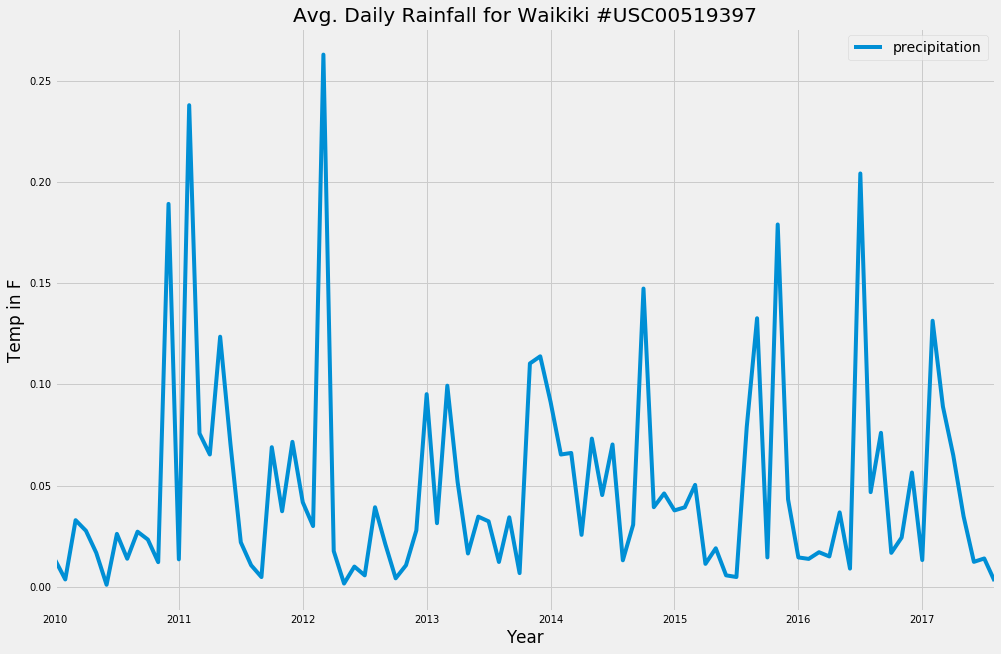

In [35]:
USC00519397['precipitation'].plot(kind='line', title ="Avg. Daily Rainfall for Waikiki #USC00519397", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

Text(0, 0.5, 'Temp in F')

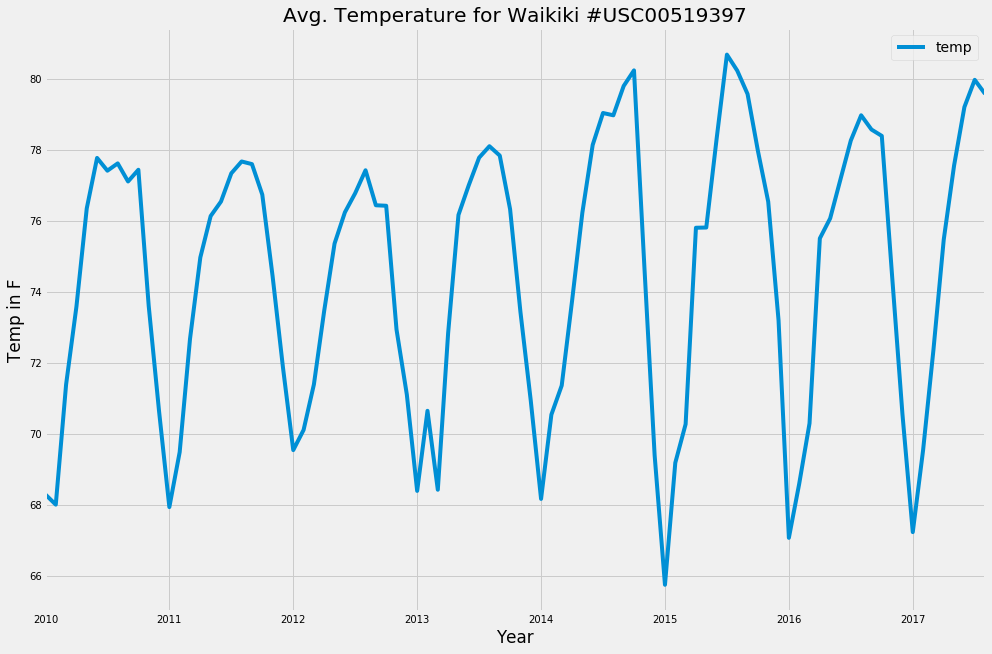

In [36]:
USC00519397['temp'].plot(kind='line', title ="Avg. Temperature for Waikiki #USC00519397", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [37]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00513117 = avgtemp.loc[avgtemp['station'] == 'USC00513117']
USC00513117

station       date       temp  precipitation
70   USC00513117 2010-01-31  70.225806       0.104839
71   USC00513117 2010-02-28  68.076923       0.061200
72   USC00513117 2010-03-31  70.064516       0.083548
73   USC00513117 2010-04-30  71.066667       0.063667
74   USC00513117 2010-05-31  73.387097       0.057097
..           ...        ...        ...            ...
156  USC00513117 2017-03-31  71.225806       0.219032
157  USC00513117 2017-04-30  71.933333       0.314000
158  USC00513117 2017-05-31  73.354839       0.130645
159  USC00513117 2017-06-30  75.966667       0.099333
160  USC00513117 2017-07-31  77.225806       0.069677

[91 rows x 4 columns]

In [38]:
USC00513117 = USC00513117.set_index('date')
USC00513117

station       temp  precipitation
date                                             
2010-01-31  USC00513117  70.225806       0.104839
2010-02-28  USC00513117  68.076923       0.061200
2010-03-31  USC00513117  70.064516       0.083548
2010-04-30  USC00513117  71.066667       0.063667
2010-05-31  USC00513117  73.387097       0.057097
...                 ...        ...            ...
2017-03-31  USC00513117  71.225806       0.219032
2017-04-30  USC00513117  71.933333       0.314000
2017-05-31  USC00513117  73.354839       0.130645
2017-06-30  USC00513117  75.966667       0.099333
2017-07-31  USC00513117  77.225806       0.069677

[91 rows x 3 columns]

Text(0, 0.5, 'Temp in F')

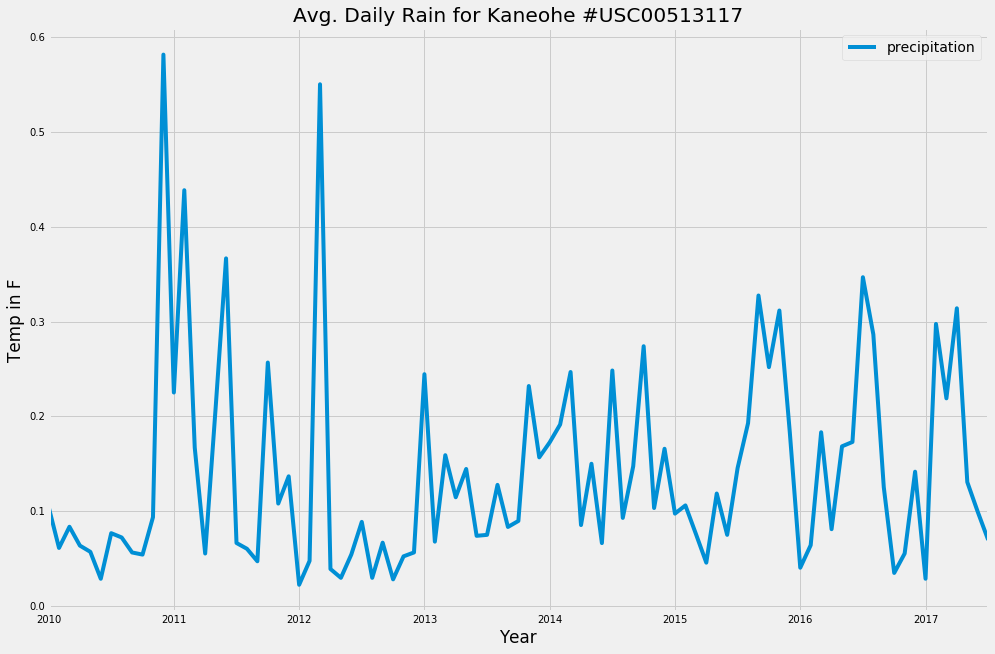

In [39]:
USC00513117['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Kaneohe #USC00513117", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

Text(0, 0.5, 'Temp in F')

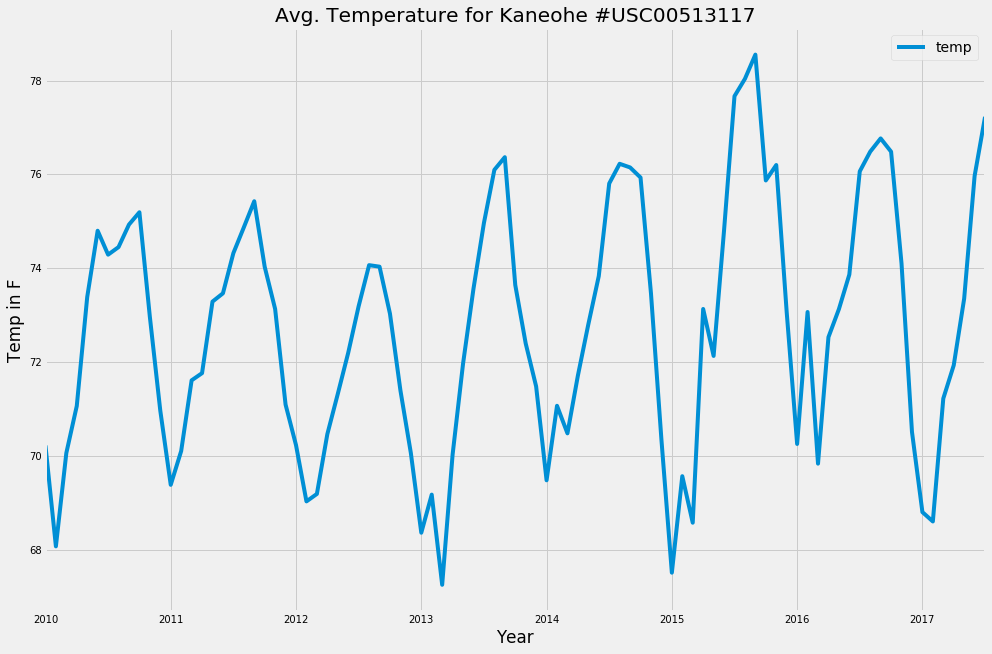

In [40]:
USC00513117['temp'].plot(kind='line', title ="Avg. Temperature for Kaneohe #USC00513117", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [41]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00514830 = avgtemp.loc[avgtemp['station'] == 'USC00514830']

In [42]:
USC00514830 = USC00514830.set_index('date')
USC00514830

station       temp  precipitation
date                                             
2010-03-31  USC00514830  69.571429       0.080000
2010-04-30  USC00514830  70.551724       0.050714
2010-05-31  USC00514830  72.928571       0.066538
2010-06-30  USC00514830  73.689655       0.026071
2010-07-31  USC00514830  72.851852       0.085769
...                 ...        ...            ...
2017-04-30  USC00514830  75.769231       0.223478
2017-05-31  USC00514830  77.961538       0.109130
2017-06-30  USC00514830  78.875000       0.123810
2017-07-31  USC00514830  80.384615       0.110909
2017-08-31  USC00514830  80.100000       0.018947

[90 rows x 3 columns]

Text(0, 0.5, 'Temp in F')

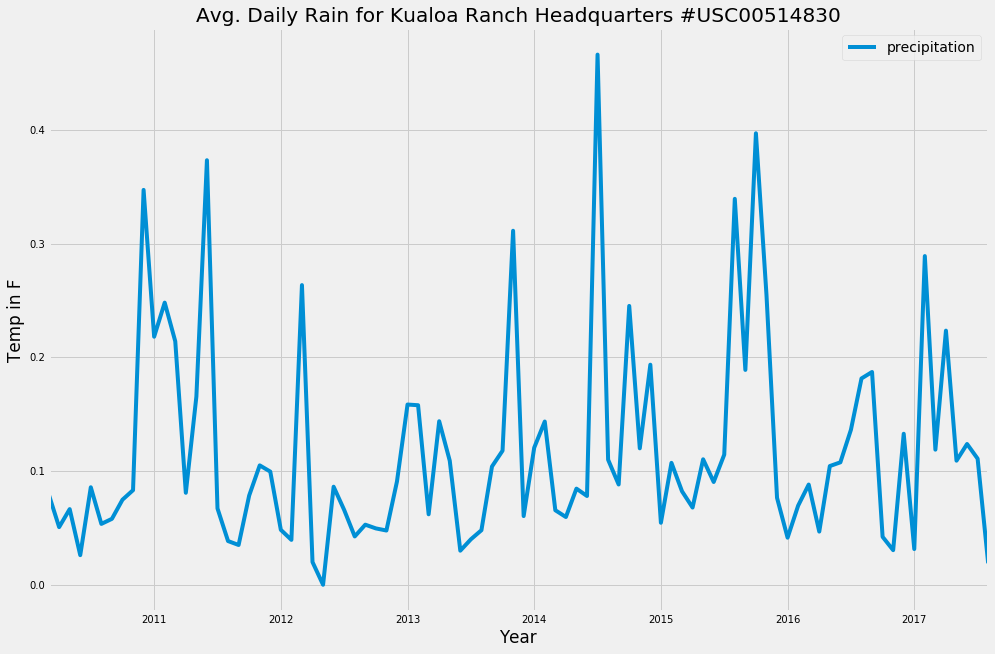

In [43]:
USC00514830['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Kualoa Ranch Headquarters #USC00514830", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

Text(0, 0.5, 'Temp in F')

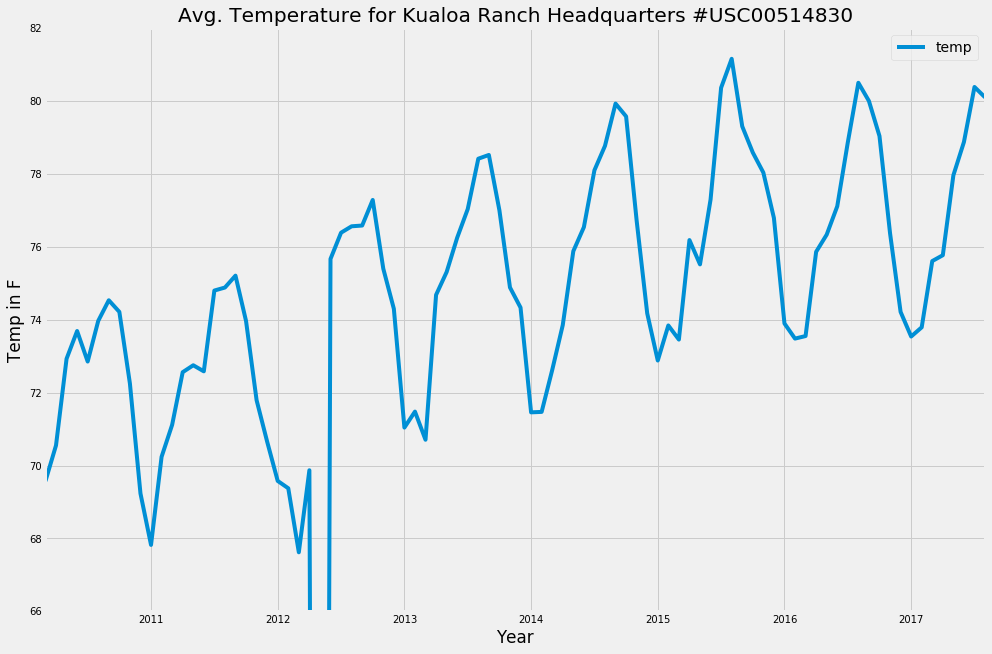

In [44]:
USC00514830['temp'].plot(kind='line', title ="Avg. Temperature for Kualoa Ranch Headquarters #USC00514830", figsize=(15, 10), legend=True, fontsize=10)
plt.ylim((66,82))
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [45]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00517948 = avgtemp.loc[avgtemp['station'] == 'USC00517948']

In [46]:
USC00517948 = USC00517948.set_index('date')
USC00517948

station       temp  precipitation
date                                             
2010-05-31  USC00517948  75.894737       0.009375
2010-06-30  USC00517948  76.750000       0.016500
2010-07-31  USC00517948  74.928571       0.019231
2010-08-31  USC00517948  75.142857       0.027143
2010-09-30  USC00517948  76.052632       0.024737
...                 ...        ...            ...
2017-03-31  USC00517948  71.058824       0.380000
2017-04-30  USC00517948  75.277778       0.000000
2017-05-31  USC00517948   0.000000       0.000000
2017-06-30  USC00517948  78.600000       0.020000
2017-07-31  USC00517948  80.235294       0.001667

[87 rows x 3 columns]

Text(0, 0.5, 'Temp in F')

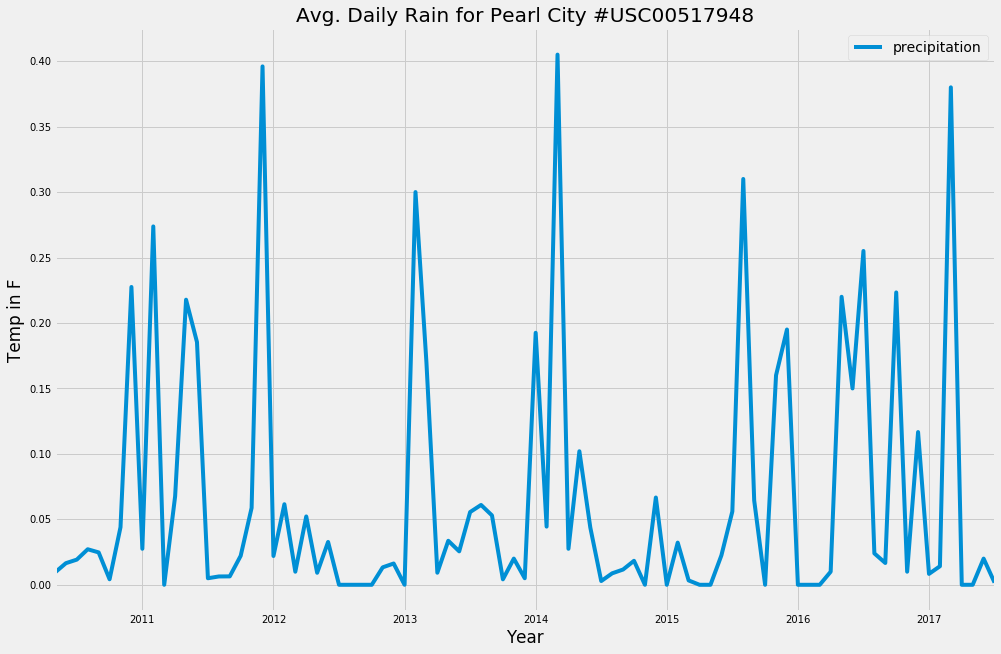

In [47]:
USC00517948['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Pearl City #USC00517948", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

Text(0, 0.5, 'Temp in F')

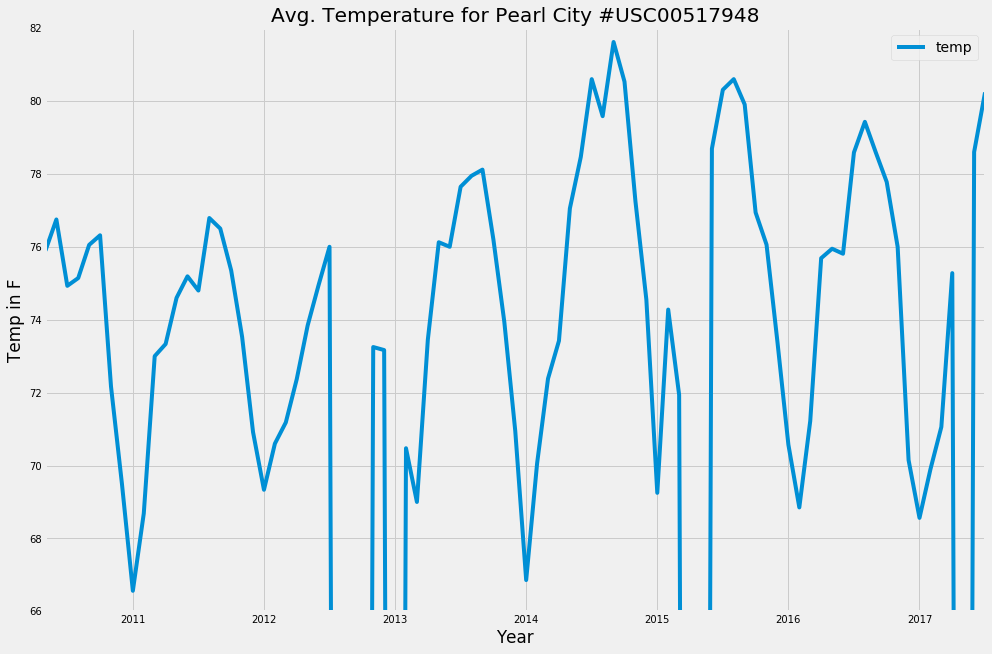

In [48]:
USC00517948['temp'].plot(kind='line', title ="Avg. Temperature for Pearl City #USC00517948", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.ylim((66,82))
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [49]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00518838 = avgtemp.loc[avgtemp['station'] == 'USC00518838']

In [50]:
USC00518838 = USC00518838.set_index('date')
USC00518838

station       temp  precipitation
date                                             
2010-01-31  USC00518838  70.300000       0.049412
2010-02-28  USC00518838  67.800000       0.071250
2010-03-31  USC00518838  66.000000       0.247500
2010-04-30  USC00518838  69.000000       0.519333
2010-05-31  USC00518838  72.636364       0.181000
...                 ...        ...            ...
2015-07-31  USC00518838   0.000000       0.000000
2015-08-31  USC00518838   0.000000       0.000000
2015-09-30  USC00518838  75.333333       0.000000
2015-10-31  USC00518838  76.714286       0.000000
2015-11-30  USC00518838  74.400000       0.000000

[71 rows x 3 columns]

Text(0, 0.5, 'Temp in F')

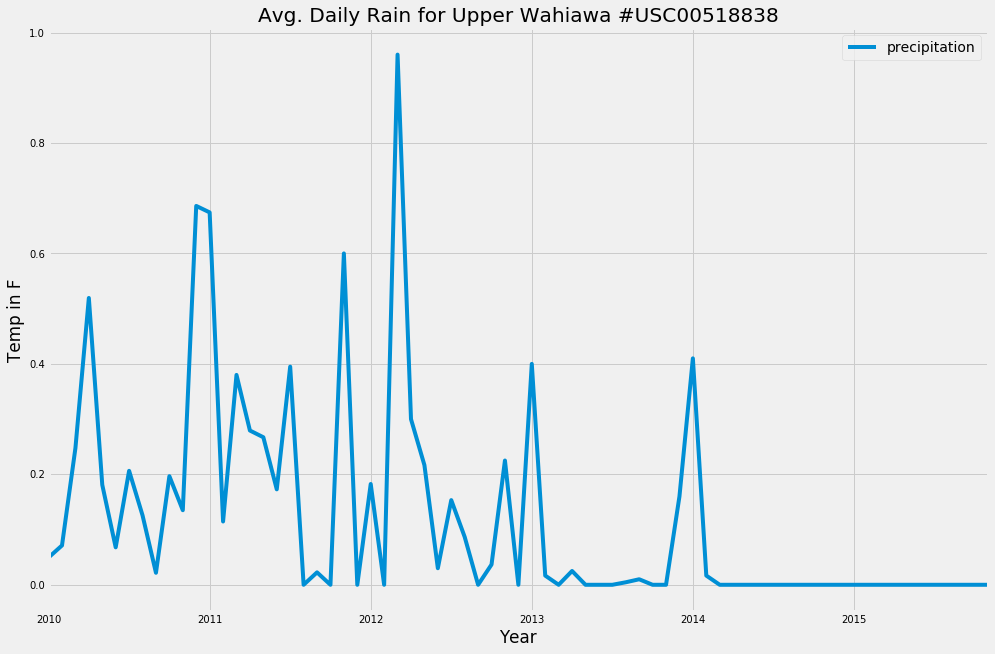

In [51]:
USC00518838['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Upper Wahiawa #USC00518838", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

Text(0, 0.5, 'Temp in F')

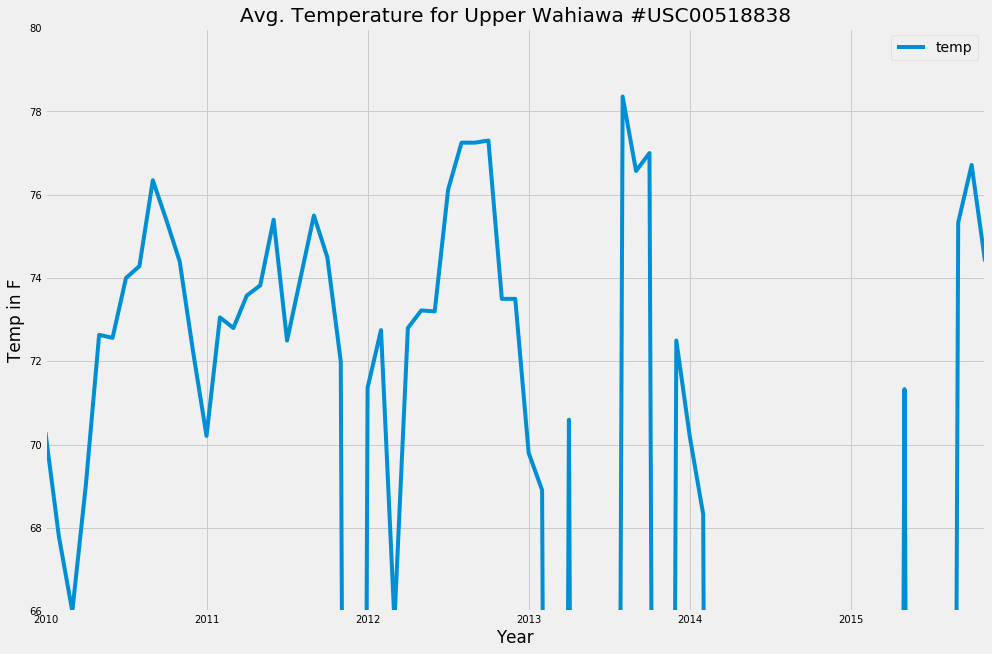

In [52]:
USC00518838['temp'].plot(kind='line', title ="Avg. Temperature for Upper Wahiawa #USC00518838", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.ylim((66,80))
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [53]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00519523 = avgtemp.loc[avgtemp['station'] == 'USC00519523']

In [54]:
USC00519523 = USC00519523.set_index('date')
USC00519523

station       temp  precipitation
date                                             
2010-01-31  USC00519523  69.967742       0.191613
2010-02-28  USC00519523  68.035714       0.052857
2010-03-31  USC00519523  71.612903       0.064839
2010-04-30  USC00519523  72.200000       0.045000
2010-05-31  USC00519523  75.551724       0.038966
...                 ...        ...            ...
2017-04-30  USC00519523  76.000000       0.443600
2017-05-31  USC00519523  77.366667       0.089655
2017-06-30  USC00519523  78.896552       0.031786
2017-07-31  USC00519523  80.714286       0.020400
2017-08-31  USC00519523  81.210526       0.020000

[92 rows x 3 columns]

Text(0, 0.5, 'Temp in F')

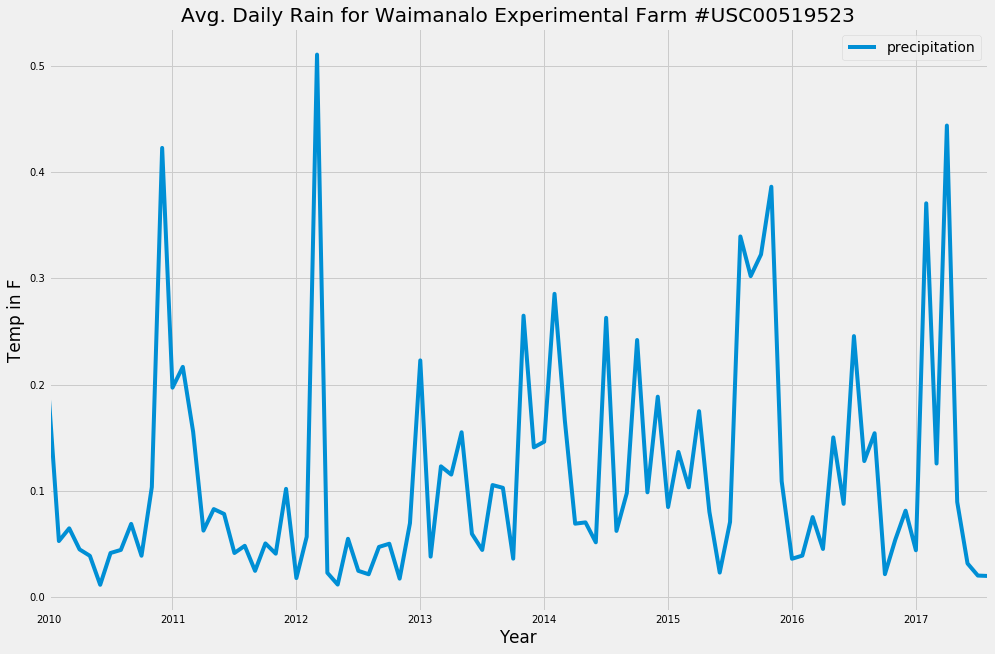

In [55]:
USC00519523['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Waimanalo Experimental Farm #USC00519523", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

Text(0, 0.5, 'Temp in F')

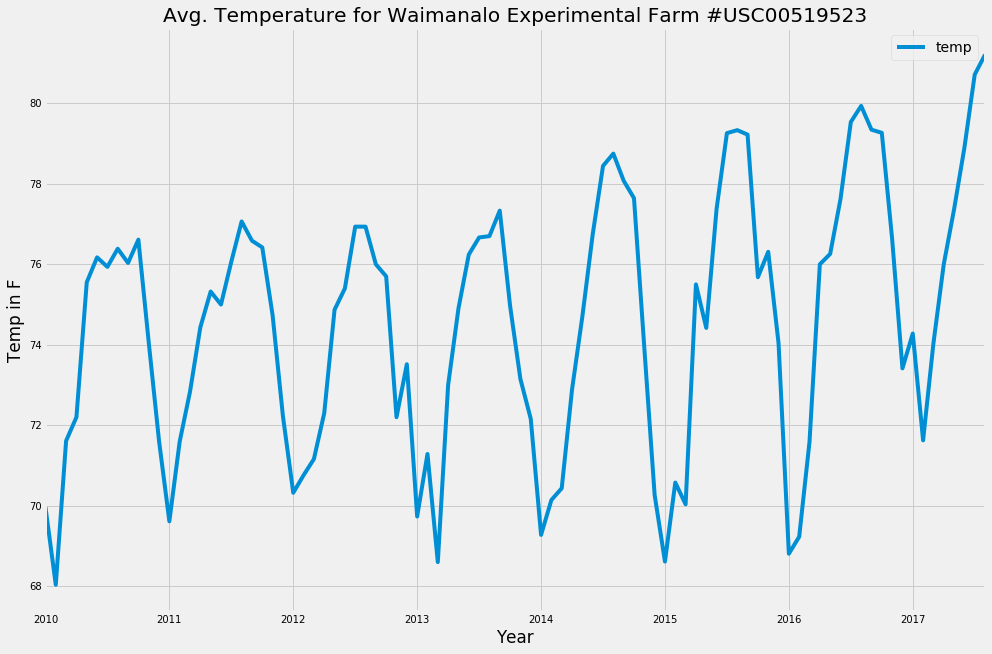

In [56]:
USC00519523['temp'].plot(kind='line', title ="Avg. Temperature for Waimanalo Experimental Farm #USC00519523", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [57]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00519281 = avgtemp.loc[avgtemp['station'] == 'USC00519281']

In [58]:
USC00519281 = USC00519281.set_index('date')
USC00519281

station       temp  precipitation
date                                             
2010-01-31  USC00519281  68.612903       0.155484
2010-02-28  USC00519281  66.464286       0.053571
2010-03-31  USC00519281  69.354839       0.147419
2010-04-30  USC00519281  70.100000       0.208000
2010-05-31  USC00519281  72.419355       0.145806
...                 ...        ...            ...
2017-04-30  USC00519281  70.966667       0.450667
2017-05-31  USC00519281  73.096774       0.191613
2017-06-30  USC00519281  74.766667       0.142000
2017-07-31  USC00519281  76.935484       0.119677
2017-08-31  USC00519281  78.222222       0.063333

[92 rows x 3 columns]

Text(0, 0.5, 'Rain in Inches')

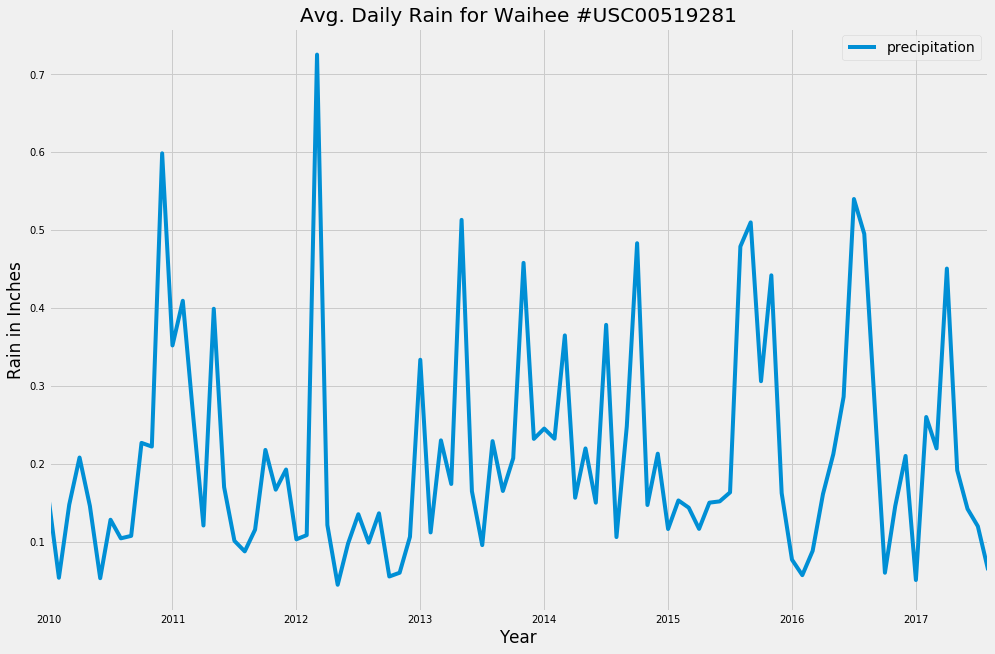

In [59]:
USC00519281['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Waihee #USC00519281", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Rain in Inches')

Text(0, 0.5, 'Temp in F')

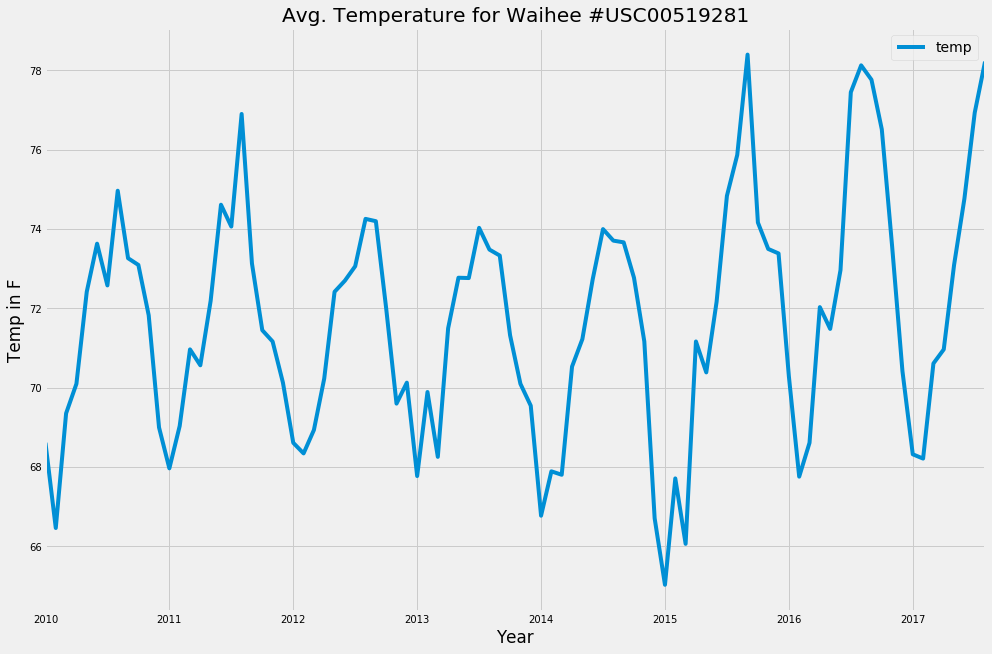

In [60]:
USC00519281['temp'].plot(kind='line', title ="Avg. Temperature for Waihee #USC00519281", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [61]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00511918 = avgtemp.loc[avgtemp['station'] == 'USC00511918']

In [62]:
USC00511918 = USC00511918.set_index('date')
USC00511918

station       temp  precipitation
date                                             
2010-01-31  USC00511918  68.137931       0.031379
2010-02-28  USC00511918  65.192308       0.023200
2010-03-31  USC00511918  68.900000       0.010667
2010-04-30  USC00511918  70.800000       0.038667
2010-05-31  USC00511918  73.033333       0.043103
...                 ...        ...            ...
2015-06-30  USC00511918  70.157895       0.015333
2015-07-31  USC00511918  74.444444       0.000000
2015-08-31  USC00511918  79.000000       0.328571
2015-09-30  USC00511918  75.750000       0.090000
2015-10-31  USC00511918  73.500000       0.059375

[70 rows x 3 columns]

Text(0, 0.5, 'Rain in Inches')

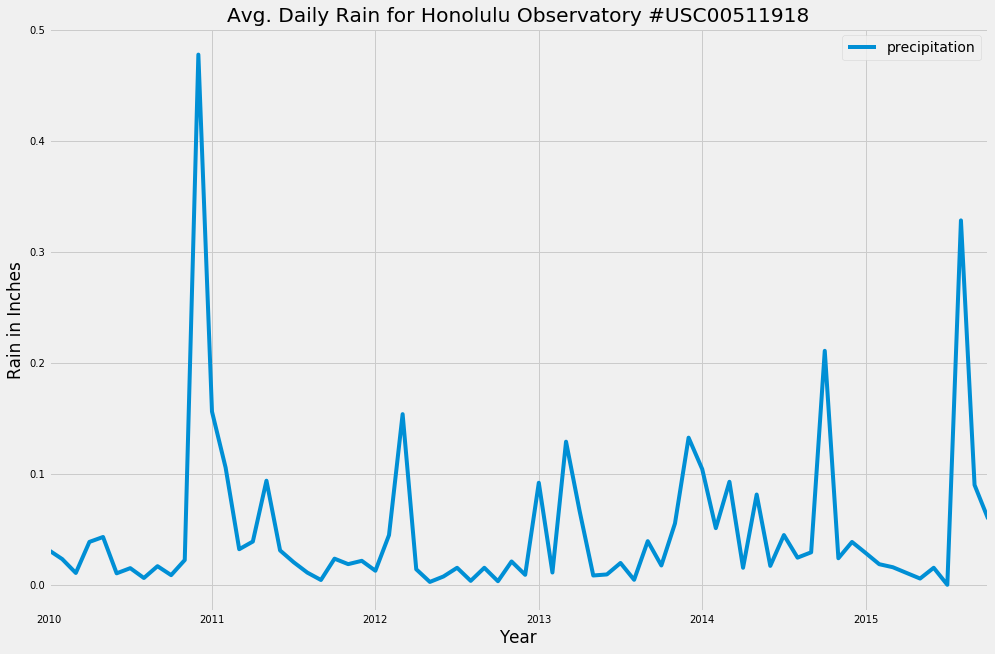

In [63]:
USC00511918['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Honolulu Observatory #USC00511918", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Rain in Inches')

Text(0, 0.5, 'Temp in F')

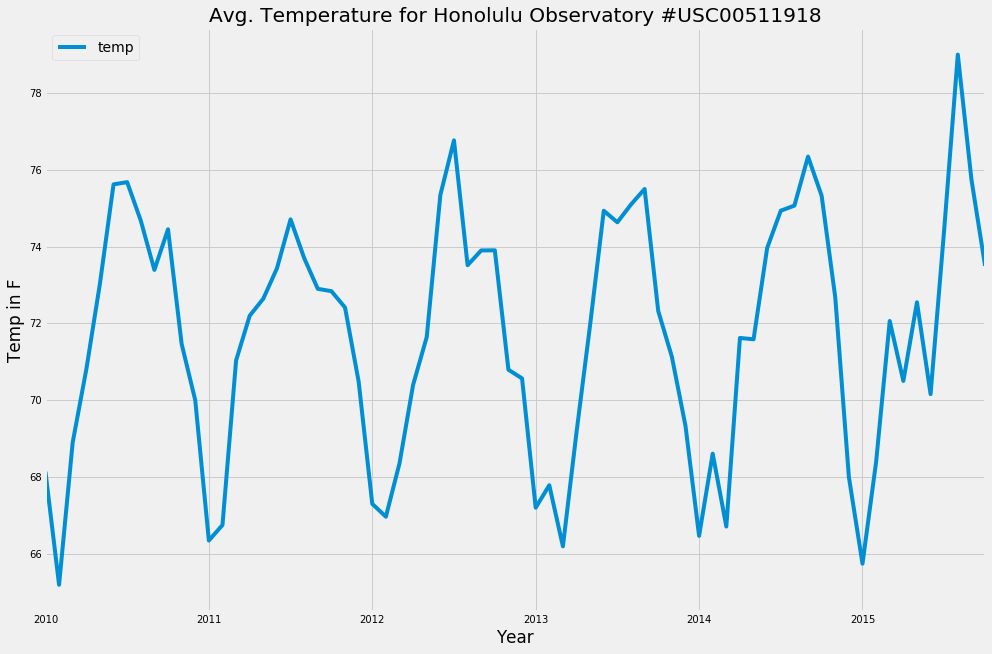

In [64]:
USC00511918['temp'].plot(kind='line', title ="Avg. Temperature for Honolulu Observatory #USC00511918", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')

In [65]:
avgtemp = temper.set_index('date').groupby('station').resample('M').mean().fillna(0).reset_index()
USC00516128 = avgtemp.loc[avgtemp['station'] == 'USC00516128']

In [66]:
USC00516128 = USC00516128.set_index('date')
USC00516128

station       temp  precipitation
date                                             
2010-01-31  USC00516128  69.419355       0.103871
2010-02-28  USC00516128  68.384615       0.134800
2010-03-31  USC00516128  69.161290       0.444839
2010-04-30  USC00516128  70.724138       0.536071
2010-05-31  USC00516128  72.629630       0.227500
...                 ...        ...            ...
2017-04-30  USC00516128  71.241379       0.492500
2017-05-31  USC00516128  71.851852       0.381667
2017-06-30  USC00516128  74.928571       0.357692
2017-07-31  USC00516128  75.290323       0.466774
2017-08-31  USC00516128  75.136364       0.256667

[92 rows x 3 columns]

Text(0, 0.5, 'Rain in Inches')

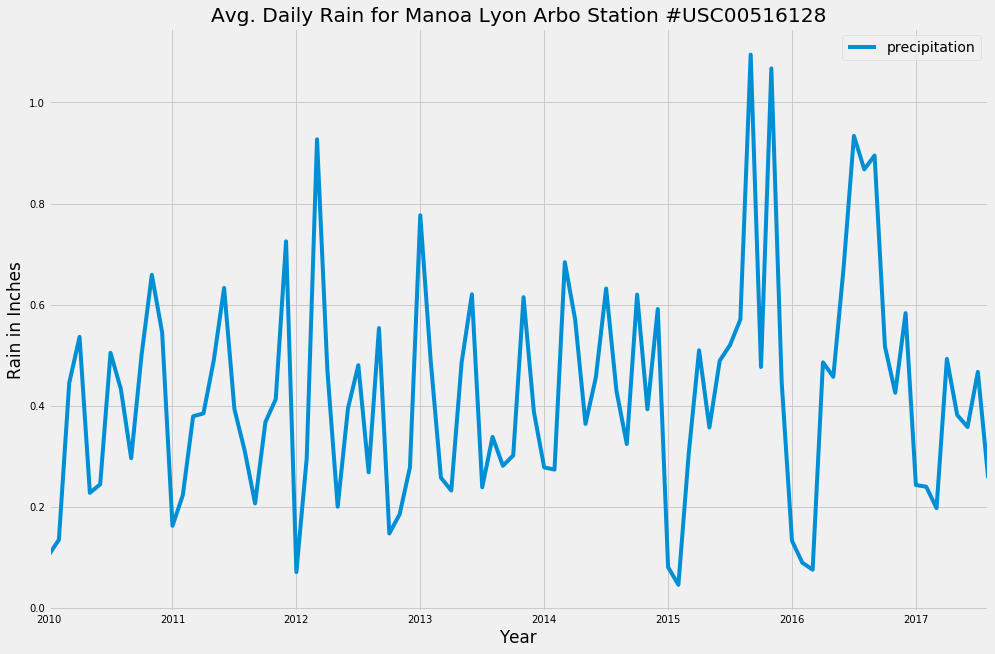

In [67]:
USC00516128['precipitation'].plot(kind='line', title ="Avg. Daily Rain for Manoa Lyon Arbo Station #USC00516128", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Rain in Inches')

Text(0, 0.5, 'Temp in F')

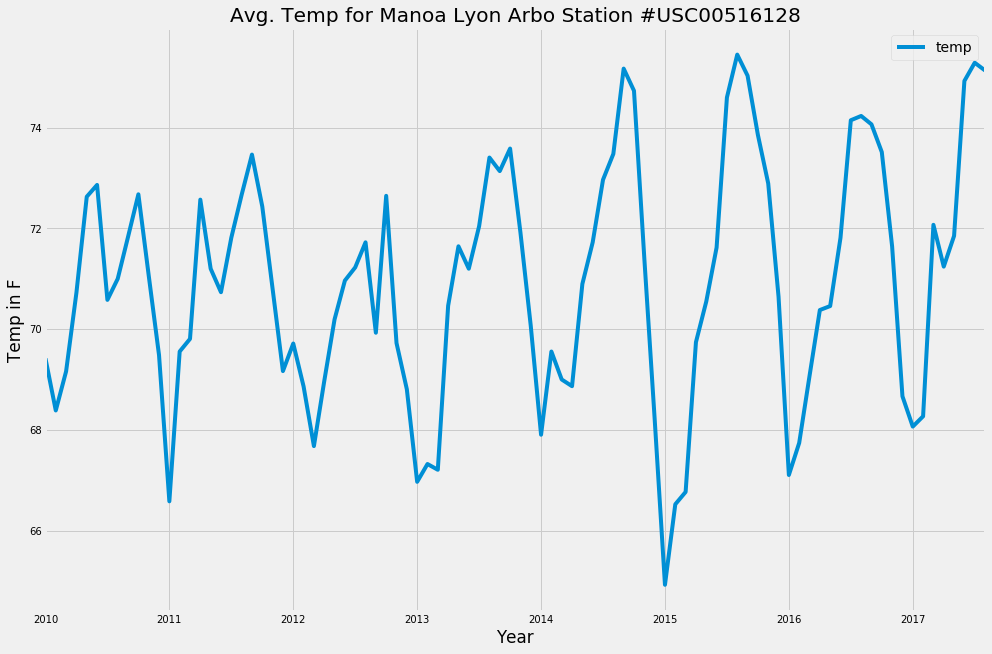

In [68]:
USC00516128['temp'].plot(kind='line', title ="Avg. Temp for Manoa Lyon Arbo Station #USC00516128", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Temp in F')


In [69]:
rain = df.groupby(pd.Grouper(key='date',freq='M'))['precipitation'].describe()
rain

count      mean       std  min  25%   50%     75%   max
date                                                               
2010-01-31  196.0  0.098622  0.315116  0.0  0.0  0.00  0.0400  2.75
2010-02-28  169.0  0.057278  0.156135  0.0  0.0  0.00  0.0200  0.87
2010-03-31  216.0  0.134815  0.285952  0.0  0.0  0.02  0.1200  2.20
2010-04-30  217.0  0.164055  0.439691  0.0  0.0  0.02  0.1200  3.99
2010-05-31  234.0  0.085897  0.183942  0.0  0.0  0.01  0.0700  1.06
...           ...       ...       ...  ...  ...   ...     ...   ...
2017-04-30  171.0  0.321111  0.702469  0.0  0.0  0.02  0.3100  6.25
2017-05-31  167.0  0.151317  0.315384  0.0  0.0  0.02  0.1250  2.17
2017-06-30  171.0  0.120000  0.217726  0.0  0.0  0.02  0.1500  1.69
2017-07-31  176.0  0.134773  0.386084  0.0  0.0  0.02  0.1125  4.00
2017-08-31   81.0  0.063951  0.126023  0.0  0.0  0.00  0.0600  0.56

[92 rows x 8 columns]

In [70]:
degrees = df.groupby(pd.Grouper(key='station'))['temp'].describe()
degrees.reset_index()

station   count       mean       std   min   25%   50%   75%   max
0  USC00519397  2724.0  74.553231  4.629627  56.0  72.0  76.0  78.0  87.0
1  USC00513117  2709.0  72.689184  3.624668  59.0  70.0  73.0  75.0  85.0
2  USC00514830  2202.0  74.873297  3.812367  58.0  72.0  75.0  78.0  85.0
3  USC00517948  1372.0  74.684402  4.383041  58.0  72.0  75.0  78.0  87.0
4  USC00518838   511.0  72.724070  4.144946  58.0  70.0  73.0  76.0  83.0
5  USC00519523  2669.0  74.543649  4.323161  56.0  72.0  75.0  77.0  85.0
6  USC00519281  2772.0  71.663781  4.357642  54.0  69.0  72.0  74.0  85.0
7  USC00511918  1979.0  71.615968  5.476309  53.0  68.0  72.0  75.0  87.0
8  USC00516128  2612.0  70.915008  3.523904  58.0  69.0  71.0  73.0  84.0

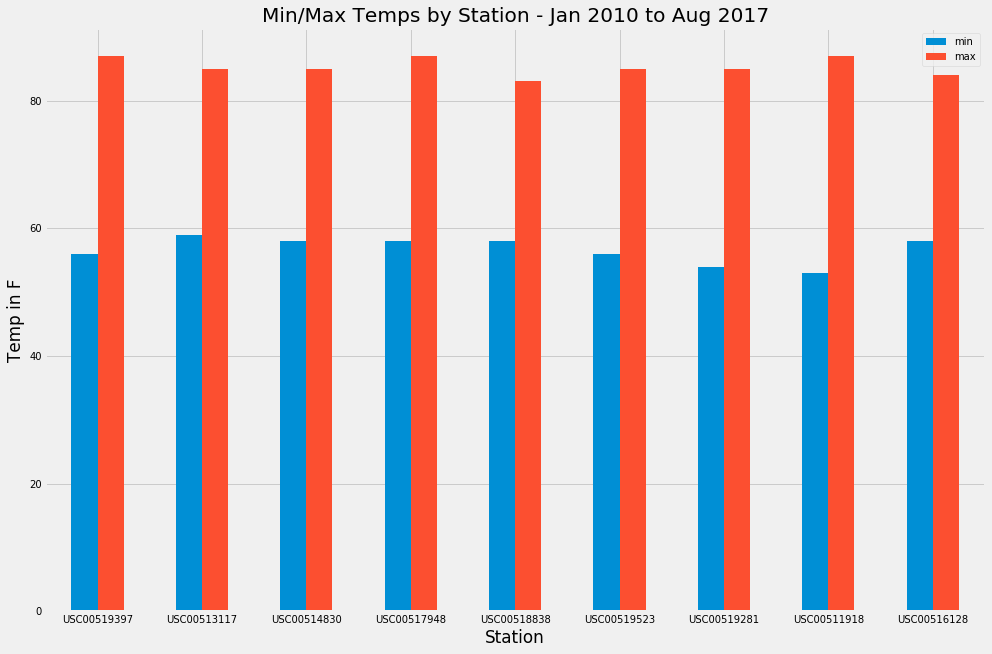

In [71]:
ax = degrees[['min','max']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=10)
plt.legend(loc="upper right", fontsize='10')
plt.xticks(rotation=0)
plt.xlabel('Station')
plt.ylabel('Temp in F')
plt.title('Min/Max Temps by Station - Jan 2010 to Aug 2017')
plt.savefig("minmaxtemp.png")

In [72]:
test2 = test.groupby('station')
test2

In [73]:
regnet = df.groupby(pd.Grouper(key='station'))['precipitation'].describe()
regnet.reset_index()

station   count      mean       std  min     25%   50%     75%    max
0  USC00519397  2685.0  0.049020  0.210583  0.0  0.0000  0.00  0.0200   4.20
1  USC00513117  2696.0  0.141921  0.433905  0.0  0.0000  0.02  0.1000   7.65
2  USC00514830  1937.0  0.121058  0.413812  0.0  0.0000  0.02  0.1000  11.53
3  USC00517948   683.0  0.063602  0.243931  0.0  0.0000  0.00  0.0200   2.80
4  USC00518838   342.0  0.207222  0.508305  0.0  0.0025  0.03  0.1975   6.30
5  USC00519523  2572.0  0.114961  0.410237  0.0  0.0000  0.00  0.0700   6.38
6  USC00519281  2772.0  0.212352  0.543312  0.0  0.0000  0.04  0.1900   9.64
7  USC00511918  1932.0  0.047971  0.244826  0.0  0.0000  0.00  0.0100   4.00
8  USC00516128  2484.0  0.429988  0.712999  0.0  0.0100  0.16  0.5400   8.06

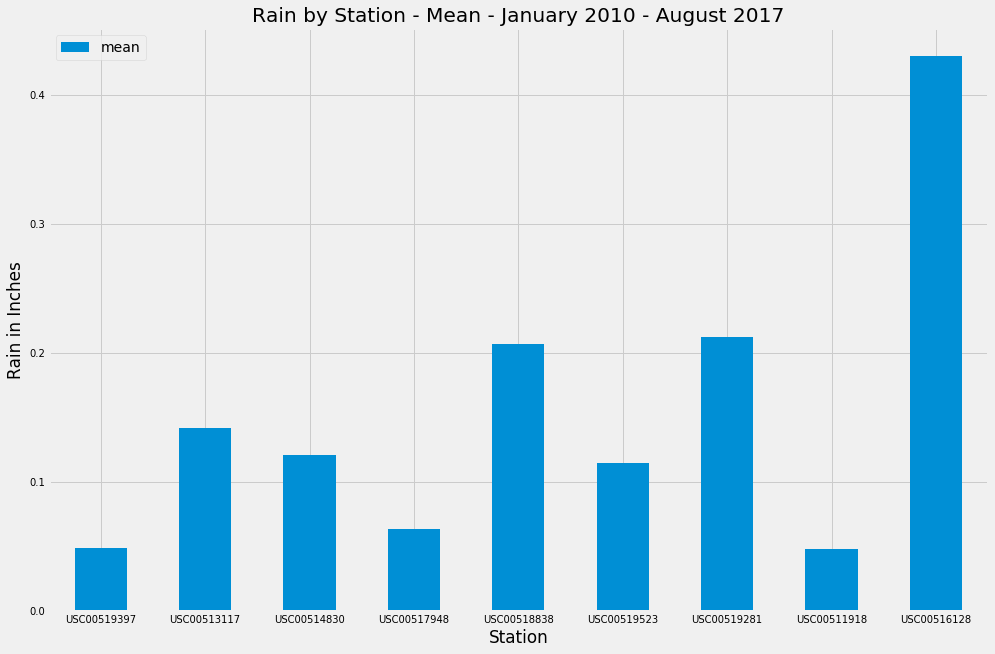

In [74]:
ax = regnet[['mean']].plot(kind='bar', title = "Rain by Station - Mean - January 2010 - August 2017", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Station')
plt.ylabel('Rain in Inches')
plt.savefig("avgrain20102017.png")

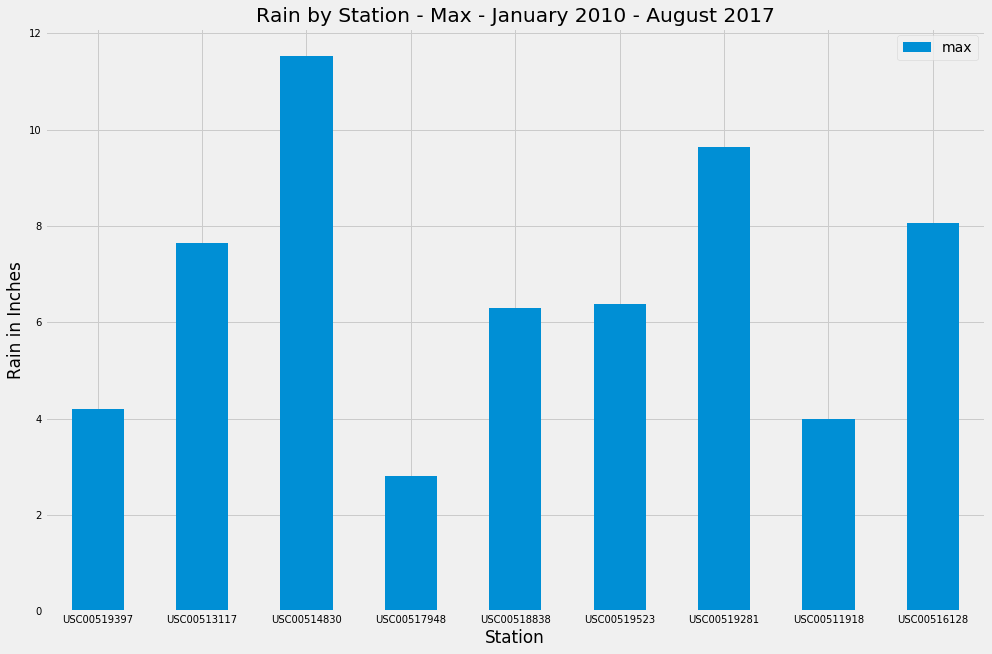

In [75]:
ax = regnet[['max']].plot(kind='bar', title = "Rain by Station - Max - January 2010 - August 2017", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Station')
plt.ylabel('Rain in Inches')
plt.savefig("maxrain.png")

In [76]:
rain = df.groupby(pd.Grouper(key='date',freq='M'))['precipitation'].describe()
rain

count      mean       std  min  25%   50%     75%   max
date                                                               
2010-01-31  196.0  0.098622  0.315116  0.0  0.0  0.00  0.0400  2.75
2010-02-28  169.0  0.057278  0.156135  0.0  0.0  0.00  0.0200  0.87
2010-03-31  216.0  0.134815  0.285952  0.0  0.0  0.02  0.1200  2.20
2010-04-30  217.0  0.164055  0.439691  0.0  0.0  0.02  0.1200  3.99
2010-05-31  234.0  0.085897  0.183942  0.0  0.0  0.01  0.0700  1.06
...           ...       ...       ...  ...  ...   ...     ...   ...
2017-04-30  171.0  0.321111  0.702469  0.0  0.0  0.02  0.3100  6.25
2017-05-31  167.0  0.151317  0.315384  0.0  0.0  0.02  0.1250  2.17
2017-06-30  171.0  0.120000  0.217726  0.0  0.0  0.02  0.1500  1.69
2017-07-31  176.0  0.134773  0.386084  0.0  0.0  0.02  0.1125  4.00
2017-08-31   81.0  0.063951  0.126023  0.0  0.0  0.00  0.0600  0.56

[92 rows x 8 columns]

In [77]:
test.reset_index()
test

station       date  precipitation
0    USC00511918 2010-01-31           0.91
1    USC00511918 2010-02-28           0.58
2    USC00511918 2010-03-31           0.32
3    USC00511918 2010-04-30           1.16
4    USC00511918 2010-05-31           1.25
..           ...        ...            ...
772  USC00519523 2017-04-30          11.09
773  USC00519523 2017-05-31           2.60
774  USC00519523 2017-06-30           0.89
775  USC00519523 2017-07-31           0.51
776  USC00519523 2017-08-31           0.34

[777 rows x 3 columns]

In [78]:
test['month'] = pd.DatetimeIndex(test['date']).month
test

station       date  precipitation  month
0    USC00511918 2010-01-31           0.91      1
1    USC00511918 2010-02-28           0.58      2
2    USC00511918 2010-03-31           0.32      3
3    USC00511918 2010-04-30           1.16      4
4    USC00511918 2010-05-31           1.25      5
..           ...        ...            ...    ...
772  USC00519523 2017-04-30          11.09      4
773  USC00519523 2017-05-31           2.60      5
774  USC00519523 2017-06-30           0.89      6
775  USC00519523 2017-07-31           0.51      7
776  USC00519523 2017-08-31           0.34      8

[777 rows x 4 columns]

In [79]:
temper['month'] = pd.DatetimeIndex(temper['date']).month
temper

date      station  temp  precipitation  month
0     2010-01-01  USC00519397  65.0           0.08      1
1     2010-01-02  USC00519397  63.0           0.00      1
2     2010-01-03  USC00519397  74.0           0.00      1
3     2010-01-04  USC00519397  76.0           0.00      1
4     2010-01-06  USC00519397  73.0            NaN      1
...          ...          ...   ...            ...    ...
19545 2017-08-19  USC00516128  71.0           0.09      8
19546 2017-08-20  USC00516128  78.0            NaN      8
19547 2017-08-21  USC00516128  76.0           0.56      8
19548 2017-08-22  USC00516128  76.0           0.50      8
19549 2017-08-23  USC00516128  76.0           0.45      8

[19550 rows x 5 columns]

In [80]:
june = test[(test['month'] == 6) & (test['station'] == 'USC00519523')]
june

station       date  precipitation  month
690  USC00519523 2010-06-30           0.34      6
702  USC00519523 2011-06-30           2.35      6
714  USC00519523 2012-06-30           1.65      6
726  USC00519523 2013-06-30           1.73      6
738  USC00519523 2014-06-30           1.24      6
750  USC00519523 2015-06-30           0.65      6
762  USC00519523 2016-06-30           2.46      6
774  USC00519523 2017-06-30           0.89      6

In [81]:
dec = test[(test['month'] == 12) & (test['station'] == 'USC00519523')]
dec

station       date  precipitation  month
696  USC00519523 2010-12-31          13.10     12
708  USC00519523 2011-12-31           3.16     12
720  USC00519523 2012-12-31           2.16     12
732  USC00519523 2013-12-31           4.37     12
744  USC00519523 2014-12-31           5.47     12
756  USC00519523 2015-12-31           2.51     12
768  USC00519523 2016-12-31           2.28     12

In [82]:
avgtemp['month'] = pd.DatetimeIndex(avgtemp['date']).month
avgtemp

station       date       temp  precipitation  month
0    USC00511918 2010-01-31  68.137931       0.031379      1
1    USC00511918 2010-02-28  65.192308       0.023200      2
2    USC00511918 2010-03-31  68.900000       0.010667      3
3    USC00511918 2010-04-30  70.800000       0.038667      4
4    USC00511918 2010-05-31  73.033333       0.043103      5
..           ...        ...        ...            ...    ...
772  USC00519523 2017-04-30  76.000000       0.443600      4
773  USC00519523 2017-05-31  77.366667       0.089655      5
774  USC00519523 2017-06-30  78.896552       0.031786      6
775  USC00519523 2017-07-31  80.714286       0.020400      7
776  USC00519523 2017-08-31  81.210526       0.020000      8

[777 rows x 5 columns]

In [83]:
junetemp = avgtemp[(avgtemp['month'] == 6) & (avgtemp['station'] == 'USC00519523')]
junetemp

station       date       temp  precipitation  month
690  USC00519523 2010-06-30  76.172414       0.011724      6
702  USC00519523 2011-06-30  75.000000       0.078333      6
714  USC00519523 2012-06-30  75.400000       0.055000      6
726  USC00519523 2013-06-30  76.241379       0.059655      6
738  USC00519523 2014-06-30  76.740741       0.051667      6
750  USC00519523 2015-06-30  77.379310       0.023214      6
762  USC00519523 2016-06-30  77.620690       0.087857      6
774  USC00519523 2017-06-30  78.896552       0.031786      6

In [84]:
dectemp = avgtemp[(avgtemp['month'] == 12) & (avgtemp['station'] == 'USC00519523')]
dectemp

station       date       temp  precipitation  month
696  USC00519523 2010-12-31  71.612903       0.422581     12
708  USC00519523 2011-12-31  72.225806       0.101935     12
720  USC00519523 2012-12-31  73.516129       0.069677     12
732  USC00519523 2013-12-31  72.161290       0.140968     12
744  USC00519523 2014-12-31  70.266667       0.188621     12
756  USC00519523 2015-12-31  74.037037       0.109130     12
768  USC00519523 2016-12-31  73.413793       0.081429     12

In [85]:
test.date.map(lambda x: x.strftime('%m'))

0      01
1      02
2      03
3      04
4      05
       ..
772    04
773    05
774    06
775    07
776    08
Name: date, Length: 777, dtype: object

In [86]:
test.date.map(lambda x: x.strftime('%Y'))

0      2010
1      2010
2      2010
3      2010
4      2010
       ... 
772    2017
773    2017
774    2017
775    2017
776    2017
Name: date, Length: 777, dtype: object

In [87]:
decalltemp = avgtemp[(avgtemp['month'] == 12)]
decalltemp

station       date       temp  precipitation  month
11   USC00511918 2010-12-31  70.000000       0.478065     12
23   USC00511918 2011-12-31  70.483871       0.021613     12
35   USC00511918 2012-12-31  70.566667       0.009000     12
47   USC00511918 2013-12-31  69.333333       0.132667     12
59   USC00511918 2014-12-31  68.000000       0.038621     12
81   USC00513117 2010-12-31  70.967742       0.581613     12
93   USC00513117 2011-12-31  71.096774       0.136774     12
105  USC00513117 2012-12-31  70.064516       0.056452     12
117  USC00513117 2013-12-31  71.483871       0.156774     12
129  USC00513117 2014-12-31  70.354839       0.165806     12
141  USC00513117 2015-12-31  73.066667       0.183000     12
153  USC00513117 2016-12-31  70.516129       0.141613     12
170  USC00514830 2010-12-31  69.233333       0.347241     12
182  USC00514830 2011-12-31  70.653846       0.099524     12
194  USC00514830 2012-12-31  74.300000       0.090833     12
206  USC00514830 2013-12-31  74.333333       0.060435     12
218  USC00514830 2014-12-31  74.173913       0.193529     12
230  USC00514830 2015-12-31  76.791667       0.076500     12
242  USC00514830 2016-12-31  74.214286       0.132800     12
262  USC00516128 2010-12-31  69.483871       0.544516     12
274  USC00516128 2011-12-31  69.166667       0.725172     12
286  USC00516128 2012-12-31  68.806452       0.278387     12
298  USC00516128 2013-12-31  70.068966       0.388148     12
310  USC00516128 2014-12-31  68.222222       0.591200     12
322  USC00516128 2015-12-31  70.642857       0.446800     12
334  USC00516128 2016-12-31  68.666667       0.583103     12
350  USC00517948 2010-12-31  69.500000       0.227500     12
362  USC00517948 2011-12-31  70.916667       0.396000     12
374  USC00517948 2012-12-31  73.166667       0.016250     12
386  USC00517948 2013-12-31  70.950000       0.005000     12
398  USC00517948 2014-12-31  74.550000       0.066667     12
410  USC00517948 2015-12-31  73.384615       0.195000     12
422  USC00517948 2016-12-31  70.150000       0.116667     12
441  USC00518838 2010-12-31  72.230769       0.686000     12
453  USC00518838 2011-12-31   0.000000       0.000000     12
465  USC00518838 2012-12-31  73.500000       0.000000     12
477  USC00518838 2013-12-31  72.500000       0.160000     12
489  USC00518838 2014-12-31   0.000000       0.000000     12
512  USC00519281 2010-12-31  69.000000       0.598710     12
524  USC00519281 2011-12-31  70.129032       0.192581     12
536  USC00519281 2012-12-31  70.129032       0.106129     12
548  USC00519281 2013-12-31  69.548387       0.231935     12
560  USC00519281 2014-12-31  66.709677       0.212903     12
572  USC00519281 2015-12-31  73.387097       0.162258     12
584  USC00519281 2016-12-31  70.419355       0.210000     12
604  USC00519397 2010-12-31  70.640000       0.189167     12
616  USC00519397 2011-12-31  71.870968       0.071613     12
628  USC00519397 2012-12-31  71.100000       0.027857     12
640  USC00519397 2013-12-31  70.935484       0.113871     12
652  USC00519397 2014-12-31  69.387097       0.046129     12
664  USC00519397 2015-12-31  73.193548       0.043226     12
676  USC00519397 2016-12-31  70.548387       0.056452     12
696  USC00519523 2010-12-31  71.612903       0.422581     12
708  USC00519523 2011-12-31  72.225806       0.101935     12
720  USC00519523 2012-12-31  73.516129       0.069677     12
732  USC00519523 2013-12-31  72.161290       0.140968     12
744  USC00519523 2014-12-31  70.266667       0.188621     12
756  USC00519523 2015-12-31  74.037037       0.109130     12
768  USC00519523 2016-12-31  73.413793       0.081429     12

In [88]:
decalltemp.set_index('date', inplace=True)
decalltemp

station       temp  precipitation  month
date                                                    
2010-12-31  USC00511918  70.000000       0.478065     12
2011-12-31  USC00511918  70.483871       0.021613     12
2012-12-31  USC00511918  70.566667       0.009000     12
2013-12-31  USC00511918  69.333333       0.132667     12
2014-12-31  USC00511918  68.000000       0.038621     12
2010-12-31  USC00513117  70.967742       0.581613     12
2011-12-31  USC00513117  71.096774       0.136774     12
2012-12-31  USC00513117  70.064516       0.056452     12
2013-12-31  USC00513117  71.483871       0.156774     12
2014-12-31  USC00513117  70.354839       0.165806     12
2015-12-31  USC00513117  73.066667       0.183000     12
2016-12-31  USC00513117  70.516129       0.141613     12
2010-12-31  USC00514830  69.233333       0.347241     12
2011-12-31  USC00514830  70.653846       0.099524     12
2012-12-31  USC00514830  74.300000       0.090833     12
2013-12-31  USC00514830  74.333333       0.060435     12
2014-12-31  USC00514830  74.173913       0.193529     12
2015-12-31  USC00514830  76.791667       0.076500     12
2016-12-31  USC00514830  74.214286       0.132800     12
2010-12-31  USC00516128  69.483871       0.544516     12
2011-12-31  USC00516128  69.166667       0.725172     12
2012-12-31  USC00516128  68.806452       0.278387     12
2013-12-31  USC00516128  70.068966       0.388148     12
2014-12-31  USC00516128  68.222222       0.591200     12
2015-12-31  USC00516128  70.642857       0.446800     12
2016-12-31  USC00516128  68.666667       0.583103     12
2010-12-31  USC00517948  69.500000       0.227500     12
2011-12-31  USC00517948  70.916667       0.396000     12
2012-12-31  USC00517948  73.166667       0.016250     12
2013-12-31  USC00517948  70.950000       0.005000     12
2014-12-31  USC00517948  74.550000       0.066667     12
2015-12-31  USC00517948  73.384615       0.195000     12
2016-12-31  USC00517948  70.150000       0.116667     12
2010-12-31  USC00518838  72.230769       0.686000     12
2011-12-31  USC00518838   0.000000       0.000000     12
2012-12-31  USC00518838  73.500000       0.000000     12
2013-12-31  USC00518838  72.500000       0.160000     12
2014-12-31  USC00518838   0.000000       0.000000     12
2010-12-31  USC00519281  69.000000       0.598710     12
2011-12-31  USC00519281  70.129032       0.192581     12
2012-12-31  USC00519281  70.129032       0.106129     12
2013-12-31  USC00519281  69.548387       0.231935     12
2014-12-31  USC00519281  66.709677       0.212903     12
2015-12-31  USC00519281  73.387097       0.162258     12
2016-12-31  USC00519281  70.419355       0.210000     12
2010-12-31  USC00519397  70.640000       0.189167     12
2011-12-31  USC00519397  71.870968       0.071613     12
2012-12-31  USC00519397  71.100000       0.027857     12
2013-12-31  USC00519397  70.935484       0.113871     12
2014-12-31  USC00519397  69.387097       0.046129     12
2015-12-31  USC00519397  73.193548       0.043226     12
2016-12-31  USC00519397  70.548387       0.056452     12
2010-12-31  USC00519523  71.612903       0.422581     12
2011-12-31  USC00519523  72.225806       0.101935     12
2012-12-31  USC00519523  73.516129       0.069677     12
2013-12-31  USC00519523  72.161290       0.140968     12
2014-12-31  USC00519523  70.266667       0.188621     12
2015-12-31  USC00519523  74.037037       0.109130     12
2016-12-31  USC00519523  73.413793       0.081429     12

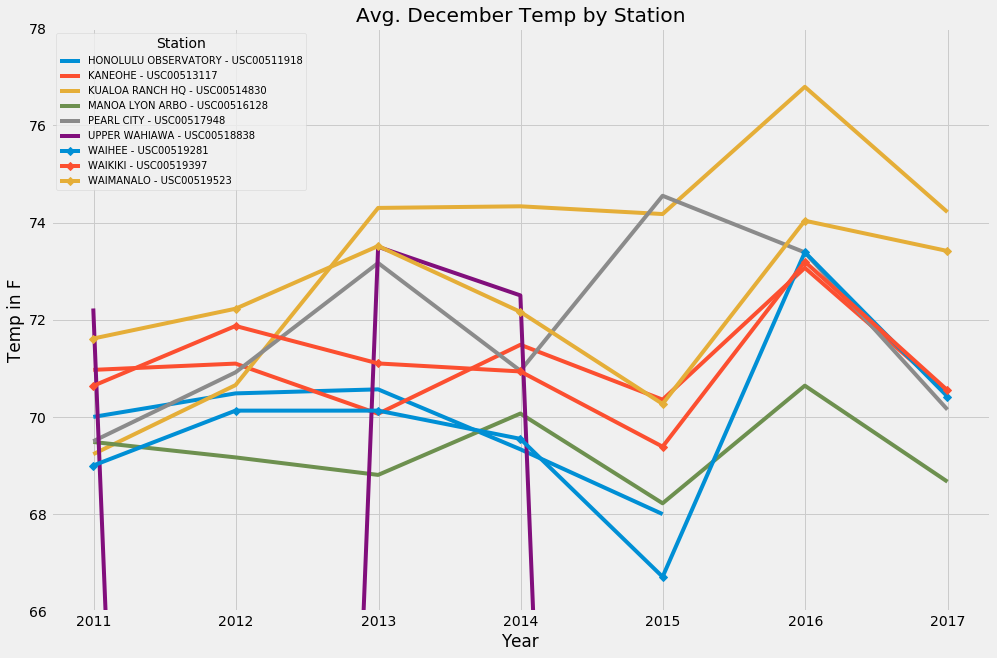

In [89]:
USC00511918 = decalltemp[decalltemp.station == 'USC00511918']
USC00513117 = decalltemp[decalltemp.station == 'USC00513117']
USC00514830 = decalltemp[decalltemp.station == 'USC00514830']
USC00516128 = decalltemp[decalltemp.station == 'USC00516128']
USC00517948 = decalltemp[decalltemp.station == 'USC00517948']
USC00518838 = decalltemp[decalltemp.station == 'USC00518838']
USC00519281 = decalltemp[decalltemp.station == 'USC00519281']
USC00519397 = decalltemp[decalltemp.station == 'USC00519397']
USC00519523 = decalltemp[decalltemp.station == 'USC00519523']
plt.figure(figsize=(15,10))
plt.ylim((66,78))
plt.plot(USC00511918.temp)
plt.plot(USC00513117.temp)
plt.plot(USC00514830.temp)
plt.plot(USC00516128.temp)
plt.plot(USC00517948.temp)
plt.plot(USC00518838.temp)
plt.plot(USC00519281.temp, '-D')
plt.plot(USC00519397.temp, '-D')
plt.plot(USC00519523.temp, '-D')
plt.legend(['HONOLULU OBSERVATORY - USC00511918', 'KANEOHE - USC00513117', 'KUALOA RANCH HQ - USC00514830', 'MANOA LYON ARBO - USC00516128', 'PEARL CITY - USC00517948', 'UPPER WAHIAWA - USC00518838', 'WAIHEE - USC00519281', 'WAIKIKI - USC00519397', 'WAIMANALO - USC00519523'], fontsize="10", mode="Expanded",
         scatterpoints=1, loc="upper left", title="Station")
plt.xlabel('Year')
plt.ylabel('Temp in F')
plt.title('Avg. December Temp by Station')
plt.show()

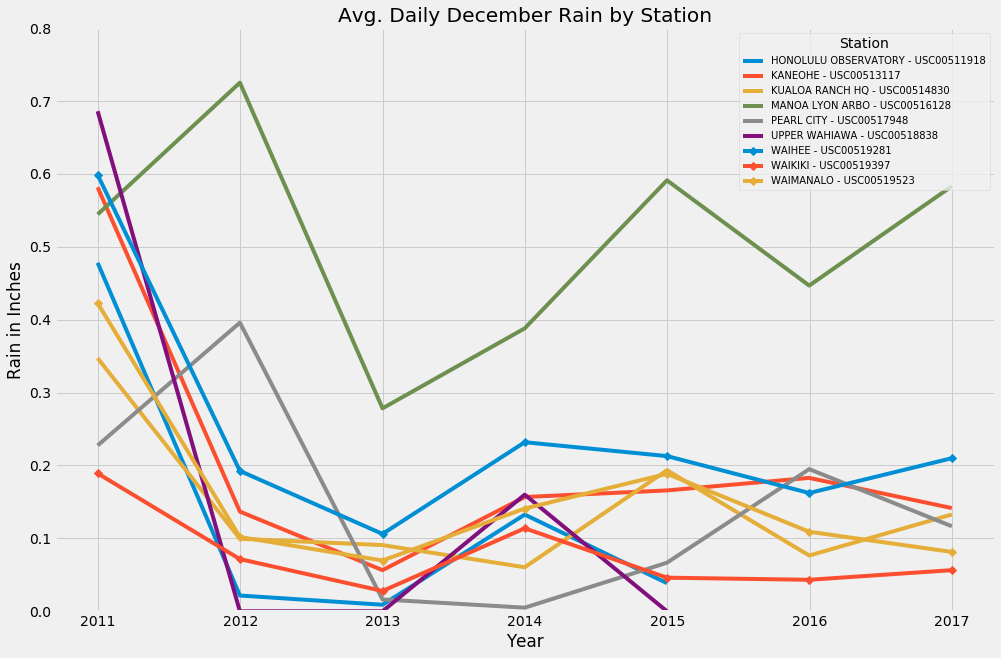

In [90]:
USC00511918 = decalltemp[decalltemp.station == 'USC00511918']
USC00513117 = decalltemp[decalltemp.station == 'USC00513117']
USC00514830 = decalltemp[decalltemp.station == 'USC00514830']
USC00516128 = decalltemp[decalltemp.station == 'USC00516128']
USC00517948 = decalltemp[decalltemp.station == 'USC00517948']
USC00518838 = decalltemp[decalltemp.station == 'USC00518838']
USC00519281 = decalltemp[decalltemp.station == 'USC00519281']
USC00519397 = decalltemp[decalltemp.station == 'USC00519397']
USC00519523 = decalltemp[decalltemp.station == 'USC00519523']
plt.figure(figsize=(15,10))
plt.ylim((0, 0.8))
plt.plot(USC00511918.precipitation)
plt.plot(USC00513117.precipitation)
plt.plot(USC00514830.precipitation)
plt.plot(USC00516128.precipitation)
plt.plot(USC00517948.precipitation)
plt.plot(USC00518838.precipitation)
plt.plot(USC00519281.precipitation, '-D')
plt.plot(USC00519397.precipitation, '-D')
plt.plot(USC00519523.precipitation, '-D')
plt.legend(['HONOLULU OBSERVATORY - USC00511918', 'KANEOHE - USC00513117', 'KUALOA RANCH HQ - USC00514830', 'MANOA LYON ARBO - USC00516128', 'PEARL CITY - USC00517948', 'UPPER WAHIAWA - USC00518838', 'WAIHEE - USC00519281', 'WAIKIKI - USC00519397', 'WAIMANALO - USC00519523'], fontsize="10", mode="Expanded",
         scatterpoints=1, loc="upper right", title="Station")
plt.xlabel('Year')
plt.ylabel('Rain in Inches')
plt.title('Avg. Daily December Rain by Station')
plt.show()

In [91]:
junetemp = avgtemp[(avgtemp['month'] == 6)]
junetemp

station       date       temp  precipitation  month
5    USC00511918 2010-06-30  75.620690       0.010345      6
17   USC00511918 2011-06-30  73.433333       0.031000      6
29   USC00511918 2012-06-30  75.344828       0.007500      6
41   USC00511918 2013-06-30  74.933333       0.009333      6
53   USC00511918 2014-06-30  73.964286       0.017037      6
..           ...        ...        ...            ...    ...
726  USC00519523 2013-06-30  76.241379       0.059655      6
738  USC00519523 2014-06-30  76.740741       0.051667      6
750  USC00519523 2015-06-30  77.379310       0.023214      6
762  USC00519523 2016-06-30  77.620690       0.087857      6
774  USC00519523 2017-06-30  78.896552       0.031786      6

[68 rows x 5 columns]

In [92]:
junetemp.set_index('date', inplace=True)
junetemp

station       temp  precipitation  month
date                                                    
2010-06-30  USC00511918  75.620690       0.010345      6
2011-06-30  USC00511918  73.433333       0.031000      6
2012-06-30  USC00511918  75.344828       0.007500      6
2013-06-30  USC00511918  74.933333       0.009333      6
2014-06-30  USC00511918  73.964286       0.017037      6
...                 ...        ...            ...    ...
2013-06-30  USC00519523  76.241379       0.059655      6
2014-06-30  USC00519523  76.740741       0.051667      6
2015-06-30  USC00519523  77.379310       0.023214      6
2016-06-30  USC00519523  77.620690       0.087857      6
2017-06-30  USC00519523  78.896552       0.031786      6

[68 rows x 4 columns]

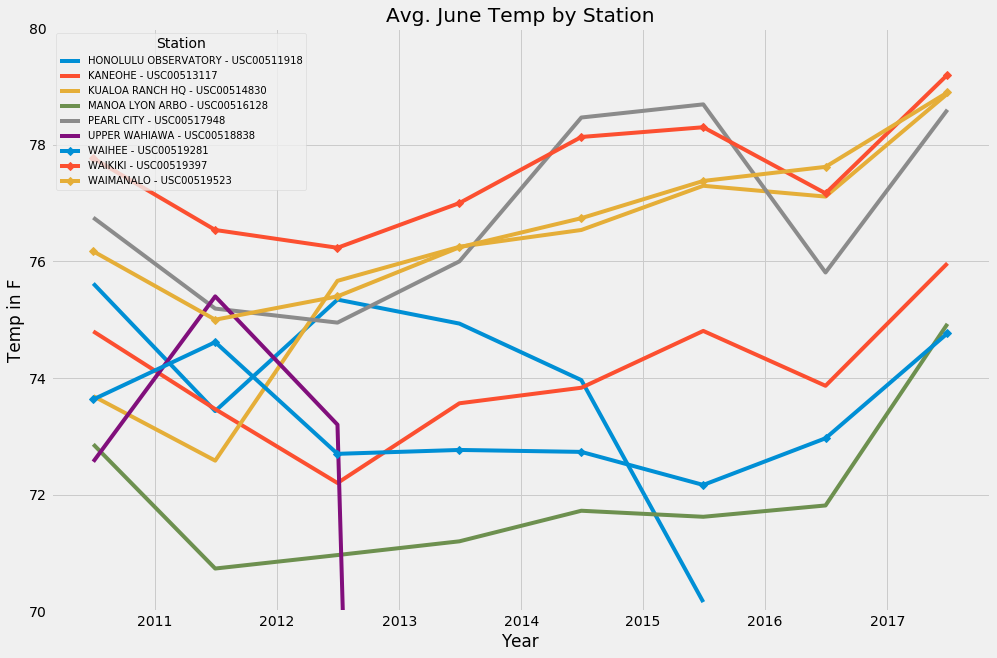

In [93]:
USC00511918 = junetemp[junetemp.station == 'USC00511918']
USC00513117 = junetemp[junetemp.station == 'USC00513117']
USC00514830 = junetemp[junetemp.station == 'USC00514830']
USC00516128 = junetemp[junetemp.station == 'USC00516128']
USC00517948 = junetemp[junetemp.station == 'USC00517948']
USC00518838 = junetemp[junetemp.station == 'USC00518838']
USC00519281 = junetemp[junetemp.station == 'USC00519281']
USC00519397 = junetemp[junetemp.station == 'USC00519397']
USC00519523 = junetemp[junetemp.station == 'USC00519523']
plt.figure(figsize=(15,10))
plt.ylim((70,80))
plt.plot(USC00511918.temp)
plt.plot(USC00513117.temp)
plt.plot(USC00514830.temp)
plt.plot(USC00516128.temp)
plt.plot(USC00517948.temp)
plt.plot(USC00518838.temp)
plt.plot(USC00519281.temp, '-D')
plt.plot(USC00519397.temp, '-D')
plt.plot(USC00519523.temp, '-D')
plt.legend(['HONOLULU OBSERVATORY - USC00511918', 'KANEOHE - USC00513117', 'KUALOA RANCH HQ - USC00514830', 'MANOA LYON ARBO - USC00516128', 'PEARL CITY - USC00517948', 'UPPER WAHIAWA - USC00518838', 'WAIHEE - USC00519281', 'WAIKIKI - USC00519397', 'WAIMANALO - USC00519523'], fontsize="10", mode="Expanded",
         scatterpoints=1, loc="upper left", title="Station")
plt.xlabel('Year')
plt.ylabel('Temp in F')
plt.title('Avg. June Temp by Station')
plt.show()

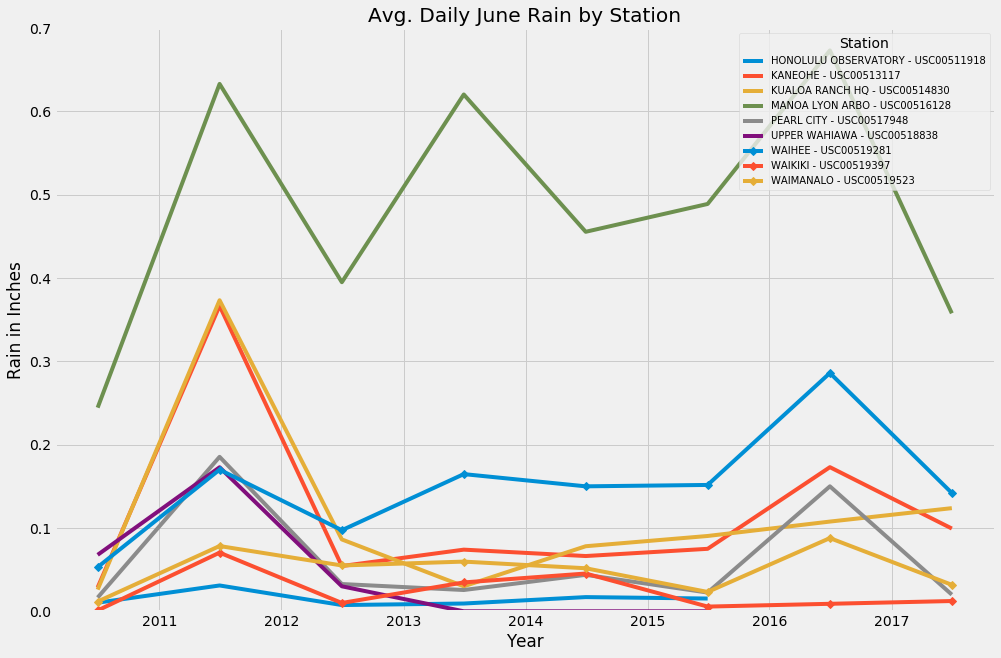

In [94]:
USC00511918 = junetemp[junetemp.station == 'USC00511918']
USC00513117 = junetemp[junetemp.station == 'USC00513117']
USC00514830 = junetemp[junetemp.station == 'USC00514830']
USC00516128 = junetemp[junetemp.station == 'USC00516128']
USC00517948 = junetemp[junetemp.station == 'USC00517948']
USC00518838 = junetemp[junetemp.station == 'USC00518838']
USC00519281 = junetemp[junetemp.station == 'USC00519281']
USC00519397 = junetemp[junetemp.station == 'USC00519397']
USC00519523 = junetemp[junetemp.station == 'USC00519523']
plt.figure(figsize=(15,10))
plt.ylim((0, 0.7))
plt.plot(USC00511918.precipitation)
plt.plot(USC00513117.precipitation)
plt.plot(USC00514830.precipitation)
plt.plot(USC00516128.precipitation)
plt.plot(USC00517948.precipitation)
plt.plot(USC00518838.precipitation)
plt.plot(USC00519281.precipitation, '-D')
plt.plot(USC00519397.precipitation, '-D')
plt.plot(USC00519523.precipitation, '-D')
plt.legend(['HONOLULU OBSERVATORY - USC00511918', 'KANEOHE - USC00513117', 'KUALOA RANCH HQ - USC00514830', 'MANOA LYON ARBO - USC00516128', 'PEARL CITY - USC00517948', 'UPPER WAHIAWA - USC00518838', 'WAIHEE - USC00519281', 'WAIKIKI - USC00519397', 'WAIMANALO - USC00519523'], fontsize="10", mode="Expanded",
         scatterpoints=1, loc="upper right", title="Station")
plt.xlabel('Year')
plt.ylabel('Rain in Inches')
plt.title('Avg. Daily June Rain by Station')
plt.show()

In [95]:
df['month'] = pd.DatetimeIndex(df['date']).month
df

date      station  precipitation  temp  month
0     2010-01-01  USC00519397           0.08  65.0      1
1     2010-01-02  USC00519397           0.00  63.0      1
2     2010-01-03  USC00519397           0.00  74.0      1
3     2010-01-04  USC00519397           0.00  76.0      1
4     2010-01-06  USC00519397            NaN  73.0      1
...          ...          ...            ...   ...    ...
19545 2017-08-19  USC00516128           0.09  71.0      8
19546 2017-08-20  USC00516128            NaN  78.0      8
19547 2017-08-21  USC00516128           0.56  76.0      8
19548 2017-08-22  USC00516128           0.50  76.0      8
19549 2017-08-23  USC00516128           0.45  76.0      8

[19550 rows x 5 columns]

In [96]:
summer=df[(df['month'] == 6)]
summer

date      station  precipitation  temp  month
133   2010-06-01  USC00519397           0.00  78.0      6
134   2010-06-02  USC00519397           0.01  76.0      6
135   2010-06-03  USC00519397           0.00  78.0      6
136   2010-06-04  USC00519397           0.00  76.0      6
137   2010-06-05  USC00519397           0.00  77.0      6
...          ...          ...            ...   ...    ...
19492 2017-06-26  USC00516128           0.02  79.0      6
19493 2017-06-27  USC00516128           0.10  74.0      6
19494 2017-06-28  USC00516128           0.02  74.0      6
19495 2017-06-29  USC00516128           0.04  76.0      6
19496 2017-06-30  USC00516128           0.20  75.0      6

[1700 rows x 5 columns]

In [97]:
summer.set_index('date', inplace=True)
summer

station  precipitation  temp  month
date                                               
2010-06-01  USC00519397           0.00  78.0      6
2010-06-02  USC00519397           0.01  76.0      6
2010-06-03  USC00519397           0.00  78.0      6
2010-06-04  USC00519397           0.00  76.0      6
2010-06-05  USC00519397           0.00  77.0      6
...                 ...            ...   ...    ...
2017-06-26  USC00516128           0.02  79.0      6
2017-06-27  USC00516128           0.10  74.0      6
2017-06-28  USC00516128           0.02  74.0      6
2017-06-29  USC00516128           0.04  76.0      6
2017-06-30  USC00516128           0.20  75.0      6

[1700 rows x 4 columns]

In [98]:
summer.describe()

precipitation         temp   month
count    1574.000000  1700.000000  1700.0
mean        0.136360    74.944118     6.0
std         0.335731     3.257417     0.0
min         0.000000    64.000000     6.0
25%         0.000000    73.000000     6.0
50%         0.020000    75.000000     6.0
75%         0.120000    77.000000     6.0
max         4.430000    85.000000     6.0

In [99]:
winter=df[(df['month'] == 12)]
winter

date      station  precipitation  temp  month
305   2010-12-01  USC00519397           0.04  76.0     12
306   2010-12-03  USC00519397           0.00  74.0     12
307   2010-12-04  USC00519397           0.00  74.0     12
308   2010-12-06  USC00519397           0.00  64.0     12
309   2010-12-07  USC00519397           0.00  64.0     12
...          ...          ...            ...   ...    ...
19323 2016-12-27  USC00516128           0.14  71.0     12
19324 2016-12-28  USC00516128           0.14  71.0     12
19325 2016-12-29  USC00516128           1.03  69.0     12
19326 2016-12-30  USC00516128           2.37  65.0     12
19327 2016-12-31  USC00516128           0.90  65.0     12

[1517 rows x 5 columns]

In [100]:
winter.set_index('date', inplace=True)
winter

station  precipitation  temp  month
date                                               
2010-12-01  USC00519397           0.04  76.0     12
2010-12-03  USC00519397           0.00  74.0     12
2010-12-04  USC00519397           0.00  74.0     12
2010-12-06  USC00519397           0.00  64.0     12
2010-12-07  USC00519397           0.00  64.0     12
...                 ...            ...   ...    ...
2016-12-27  USC00516128           0.14  71.0     12
2016-12-28  USC00516128           0.14  71.0     12
2016-12-29  USC00516128           1.03  69.0     12
2016-12-30  USC00516128           2.37  65.0     12
2016-12-31  USC00516128           0.90  65.0     12

[1517 rows x 4 columns]

In [101]:
winter.describe()

precipitation         temp   month
count    1405.000000  1517.000000  1517.0
mean        0.216819    71.041529    12.0
std         0.541399     3.745920     0.0
min         0.000000    56.000000    12.0
25%         0.000000    69.000000    12.0
50%         0.030000    71.000000    12.0
75%         0.150000    74.000000    12.0
max         6.420000    83.000000    12.0

In [102]:
summers = summer['temp']

In [103]:
winters = winter['temp']

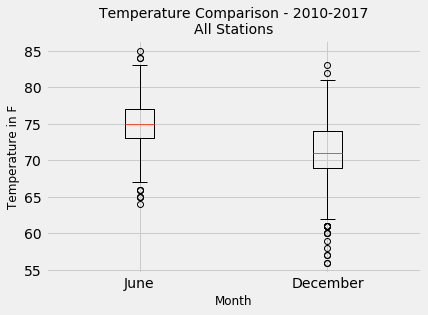

Summary Statistics


(       precipitation         temp   month
 count    1574.000000  1700.000000  1700.0
 mean        0.136360    74.944118     6.0
 std         0.335731     3.257417     0.0
 min         0.000000    64.000000     6.0
 25%         0.000000    73.000000     6.0
 50%         0.020000    75.000000     6.0
 75%         0.120000    77.000000     6.0
 max         4.430000    85.000000     6.0,
        precipitation         temp   month
 count    1405.000000  1517.000000  1517.0
 mean        0.216819    71.041529    12.0
 std         0.541399     3.745920     0.0
 min         0.000000    56.000000    12.0
 25%         0.000000    69.000000    12.0
 50%         0.030000    71.000000    12.0
 75%         0.150000    74.000000    12.0
 max         6.420000    83.000000    12.0)

In [104]:
# Create the box-and-whisker plot for comparison of all station temps.
x_labels = ['June', 'December']
all_data = [summers, winters]
fig, ax = plt.subplots()
ax.boxplot(all_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Temperature Comparison - 2010-2017\nAll Stations',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.show()
print("Summary Statistics")
summer.describe(), winter.describe()


In [105]:
summer_rain = summer['precipitation']

In [106]:
summer_rain = summer_rain.fillna(0)

In [107]:
winter_rain = winter['precipitation']

In [108]:
winter_rain = winter_rain.fillna(0)

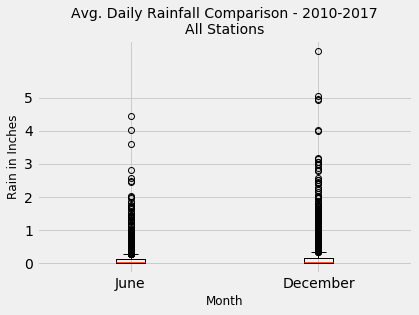

Summary Statistics


(       precipitation         temp   month
 count    1574.000000  1700.000000  1700.0
 mean        0.136360    74.944118     6.0
 std         0.335731     3.257417     0.0
 min         0.000000    64.000000     6.0
 25%         0.000000    73.000000     6.0
 50%         0.020000    75.000000     6.0
 75%         0.120000    77.000000     6.0
 max         4.430000    85.000000     6.0,
        precipitation         temp   month
 count    1405.000000  1517.000000  1517.0
 mean        0.216819    71.041529    12.0
 std         0.541399     3.745920     0.0
 min         0.000000    56.000000    12.0
 25%         0.000000    69.000000    12.0
 50%         0.030000    71.000000    12.0
 75%         0.150000    74.000000    12.0
 max         6.420000    83.000000    12.0)

In [109]:
# Create the box-and-whisker plot for comparison of all station temps.
x_labels = ['June', 'December']
rain_data = [summer_rain, winter_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nAll Stations',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.show()
print("Summary Statistics")
summer.describe(), winter.describe()

In [110]:
june_USC00511918=summer[(summer['station'] == 'USC00511918')]
june_USC00511918.describe()

precipitation        temp  month
count     159.000000  165.000000  165.0
mean        0.015157   74.139394    6.0
std         0.053425    4.072359    0.0
min         0.000000   66.000000    6.0
25%         0.000000   71.000000    6.0
50%         0.000000   74.000000    6.0
75%         0.010000   77.000000    6.0
max         0.580000   85.000000    6.0

In [111]:
june_USC00513117=summer[(summer['station'] == 'USC00513117')]
june_USC00513117.describe()

precipitation        temp  month
count     234.000000  236.000000  236.0
mean        0.118248   74.050847    6.0
std         0.407513    2.162927    0.0
min         0.000000   68.000000    6.0
25%         0.000000   73.000000    6.0
50%         0.030000   74.000000    6.0
75%         0.100000   75.000000    6.0
max         4.430000   83.000000    6.0

In [112]:
june_USC00514830=summer[(summer['station'] == 'USC00514830')]
june_USC00514830.describe()

precipitation        temp  month
count     167.000000  186.000000  186.0
mean        0.114192   76.005376    6.0
std         0.335829    2.688308    0.0
min         0.000000   67.000000    6.0
25%         0.000000   74.000000    6.0
50%         0.030000   76.000000    6.0
75%         0.120000   78.000000    6.0
max         3.600000   81.000000    6.0

In [113]:
june_USC00516128=summer[(summer['station'] == 'USC00516128')]
june_USC00516128.describe()

precipitation       temp  month
count     214.000000  223.00000  223.0
mean        0.495748   71.93722    6.0
std         0.553942    2.41161    0.0
min         0.000000   66.00000    6.0
25%         0.090000   70.00000    6.0
50%         0.295000   72.00000    6.0
75%         0.740000   73.00000    6.0
max         2.800000   79.00000    6.0

In [114]:
june_USC00517948=summer[(summer['station'] == 'USC00517948')]
june_USC00517948.describe()

precipitation        temp  month
count      79.000000  148.000000  148.0
mean        0.057975   76.655405    6.0
std         0.201070    2.851692    0.0
min         0.000000   64.000000    6.0
25%         0.000000   76.000000    6.0
50%         0.000000   77.000000    6.0
75%         0.045000   78.000000    6.0
max         1.710000   82.000000    6.0

In [115]:
june_USC00518838=summer[(summer['station'] == 'USC00518838')]
june_USC00518838.describe()

precipitation       temp  month
count      26.000000  38.000000   38.0
mean        0.094615  73.394737    6.0
std         0.173441   2.706743    0.0
min         0.000000  67.000000    6.0
25%         0.000000  72.000000    6.0
50%         0.035000  73.000000    6.0
75%         0.087500  75.750000    6.0
max         0.820000  78.000000    6.0

In [116]:
june_USC00519281=summer[(summer['station'] == 'USC00519281')]
june_USC00519281.describe()

precipitation        temp  month
count     236.000000  236.000000  236.0
mean        0.151525   73.271186    6.0
std         0.213496    2.989801    0.0
min         0.000000   65.000000    6.0
25%         0.010000   71.000000    6.0
50%         0.060000   73.000000    6.0
75%         0.212500   75.000000    6.0
max         1.390000   82.000000    6.0

In [117]:
june_USC00519397=summer[(summer['station'] == 'USC00519397')]
june_USC00519397.describe()

precipitation        temp  month
count     233.000000  236.000000  236.0
mean        0.022661   77.559322    6.0
std         0.089427    1.819714    0.0
min         0.000000   70.000000    6.0
25%         0.000000   77.000000    6.0
50%         0.000000   78.000000    6.0
75%         0.010000   79.000000    6.0
max         0.890000   84.000000    6.0

In [118]:
june_USC00519523=summer[(summer['station'] == 'USC00519523')]
june_USC00519523.describe()

precipitation        temp  month
count     226.000000  232.000000  232.0
mean        0.050044   76.668103    6.0
std         0.098610    2.303248    0.0
min         0.000000   71.000000    6.0
25%         0.000000   75.000000    6.0
50%         0.000000   76.500000    6.0
75%         0.067500   78.000000    6.0
max         0.510000   82.000000    6.0

In [119]:
dec_USC00511918=winter[(winter['station'] == 'USC00511918')]
dec_USC00511918.describe()

precipitation        temp  month
count     151.000000  152.000000  152.0
mean        0.138146   69.684211   12.0
std         0.551093    4.494914    0.0
min         0.000000   57.000000   12.0
25%         0.000000   66.000000   12.0
50%         0.000000   70.000000   12.0
75%         0.010000   73.000000   12.0
max         4.000000   81.000000   12.0

In [120]:
dec_USC00513117=winter[(winter['station'] == 'USC00513117')]
dec_USC00513117.describe()

precipitation        temp  month
count     216.000000  216.000000  216.0
mean        0.203241   71.069444   12.0
std         0.518405    2.878920    0.0
min         0.000000   63.000000   12.0
25%         0.000000   69.000000   12.0
50%         0.030000   71.000000   12.0
75%         0.152500   73.000000   12.0
max         4.940000   80.000000   12.0

In [121]:
dec_USC00514830=winter[(winter['station'] == 'USC00514830')]
dec_USC00514830.describe()

precipitation        temp  month
count     147.000000  178.000000  178.0
mean        0.154966   73.224719   12.0
std         0.370831    3.313226    0.0
min         0.000000   62.000000   12.0
25%         0.000000   71.000000   12.0
50%         0.040000   73.000000   12.0
75%         0.155000   76.000000   12.0
max         2.550000   79.000000   12.0

In [122]:
dec_USC00516128=winter[(winter['station'] == 'USC00516128')]
dec_USC00516128.describe()

precipitation        temp  month
count     197.000000  206.000000  206.0
mean        0.507005   69.291262   12.0
std         0.825186    3.073509    0.0
min         0.000000   60.000000   12.0
25%         0.010000   68.000000   12.0
50%         0.150000   69.000000   12.0
75%         0.630000   71.000000   12.0
max         6.420000   83.000000   12.0

In [123]:
dec_USC00517948=winter[(winter['station'] == 'USC00517948')]
dec_USC00517948.describe()

precipitation        temp  month
count      55.000000  109.000000  109.0
mean        0.152727   71.834862   12.0
std         0.456531    3.494741    0.0
min         0.000000   64.000000   12.0
25%         0.000000   69.000000   12.0
50%         0.020000   71.000000   12.0
75%         0.070000   74.000000   12.0
max         2.800000   82.000000   12.0

In [124]:
dec_USC00518838=winter[(winter['station'] == 'USC00518838')]
dec_USC00518838.describe()

precipitation       temp  month
count      11.000000  19.000000   19.0
mean        0.638182  72.421053   12.0
std         0.826920   3.132549    0.0
min         0.020000  63.000000   12.0
25%         0.075000  72.000000   12.0
50%         0.160000  73.000000   12.0
75%         1.105000  74.000000   12.0
max         2.500000  78.000000   12.0

In [125]:
dec_USC00519281=winter[(winter['station'] == 'USC00519281')]
dec_USC00519281.describe()

precipitation        temp  month
count     217.000000  217.000000  217.0
mean        0.244931   69.903226   12.0
std         0.489789    3.803609    0.0
min         0.000000   58.000000   12.0
25%         0.010000   68.000000   12.0
50%         0.070000   70.000000   12.0
75%         0.230000   73.000000   12.0
max         3.140000   79.000000   12.0

In [126]:
dec_USC00519397=winter[(winter['station'] == 'USC00519397')]
dec_USC00519397.describe()

precipitation        temp  month
count     207.000000  210.000000  210.0
mean        0.075314   71.109524   12.0
std         0.242803    3.554417    0.0
min         0.000000   56.000000   12.0
25%         0.000000   69.000000   12.0
50%         0.000000   72.000000   12.0
75%         0.035000   74.000000   12.0
max         2.010000   77.000000   12.0

In [127]:
dec_USC00519523=winter[(winter['station'] == 'USC00519523')]
dec_USC00519523.describe()

precipitation        temp  month
count     204.000000  210.000000  210.0
mean        0.162010   72.433333   12.0
std         0.483051    3.624456    0.0
min         0.000000   56.000000   12.0
25%         0.000000   71.000000   12.0
50%         0.030000   73.000000   12.0
75%         0.102500   75.000000   12.0
max         4.950000   79.000000   12.0

In [128]:
june_0_temp=june_USC00511918['temp']

In [129]:
dec_0_temp=dec_USC00511918['temp']

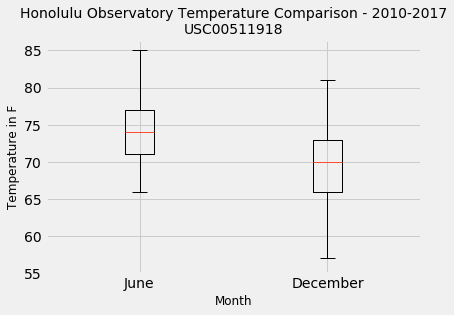

Summary Statistics


(count    165.000000
 mean      74.139394
 std        4.072359
 min       66.000000
 25%       71.000000
 50%       74.000000
 75%       77.000000
 max       85.000000
 Name: temp, dtype: float64, count    152.000000
 mean      69.684211
 std        4.494914
 min       57.000000
 25%       66.000000
 50%       70.000000
 75%       73.000000
 max       81.000000
 Name: temp, dtype: float64)

In [130]:
# Create the box-and-whisker plot for comparison of Honolulu Observatory temps.
x_labels = ["June", "December"]
data_0 = [june_0_temp, dec_0_temp]
fig, ax = plt.subplots()
ax.boxplot(data_0, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Honolulu Observatory Temperature Comparison - 2010-2017\nUSC00511918',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp0.png")
plt.show()
print("Summary Statistics")
june_0_temp.describe(), dec_0_temp.describe()

In [131]:
june_1_temp=june_USC00513117['temp']

In [132]:
dec_1_temp=dec_USC00513117['temp']

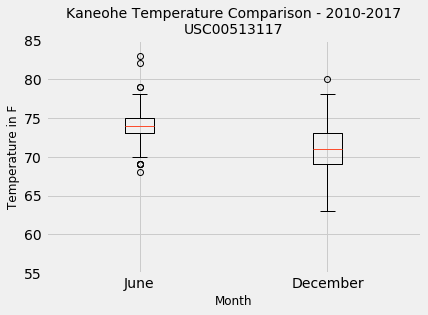

Summary Statistics


(count    236.000000
 mean      74.050847
 std        2.162927
 min       68.000000
 25%       73.000000
 50%       74.000000
 75%       75.000000
 max       83.000000
 Name: temp, dtype: float64, count    216.000000
 mean      71.069444
 std        2.878920
 min       63.000000
 25%       69.000000
 50%       71.000000
 75%       73.000000
 max       80.000000
 Name: temp, dtype: float64)

In [133]:
# Create the box-and-whisker plot for comparison of Kaneohe temps.
x_labels = ["June", "December"]
data_1 = [june_1_temp, dec_1_temp]
fig, ax = plt.subplots()
ax.boxplot(data_1, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Kaneohe Temperature Comparison - 2010-2017\nUSC00513117',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp1.png")
plt.show()
print("Summary Statistics")
june_1_temp.describe(), dec_1_temp.describe()

In [134]:
june_2_temp=june_USC00514830['temp']

In [135]:
dec_2_temp=dec_USC00514830['temp']

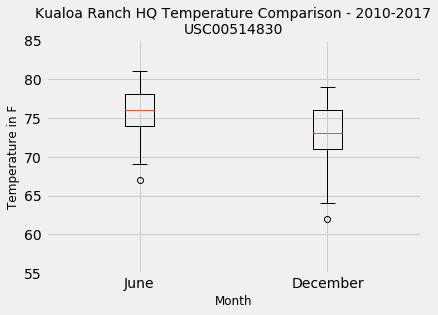

Summary Statistics


(count    186.000000
 mean      76.005376
 std        2.688308
 min       67.000000
 25%       74.000000
 50%       76.000000
 75%       78.000000
 max       81.000000
 Name: temp, dtype: float64, count    178.000000
 mean      73.224719
 std        3.313226
 min       62.000000
 25%       71.000000
 50%       73.000000
 75%       76.000000
 max       79.000000
 Name: temp, dtype: float64)

In [136]:
# Create the box-and-whisker plot for comparison of Kualoa Ranch HQ temps.
x_labels = ["June", "December"]
data_2 = [june_2_temp, dec_2_temp]
fig, ax = plt.subplots()
ax.boxplot(data_2, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Kualoa Ranch HQ Temperature Comparison - 2010-2017\nUSC00514830',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp2.png")
plt.show()
print("Summary Statistics")
june_2_temp.describe(), dec_2_temp.describe()

In [137]:
june_3_temp=june_USC00516128['temp']

In [138]:
dec_3_temp=dec_USC00516128['temp']

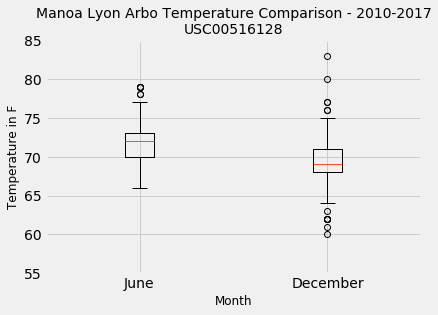

Summary Statistics


(count    223.00000
 mean      71.93722
 std        2.41161
 min       66.00000
 25%       70.00000
 50%       72.00000
 75%       73.00000
 max       79.00000
 Name: temp, dtype: float64, count    206.000000
 mean      69.291262
 std        3.073509
 min       60.000000
 25%       68.000000
 50%       69.000000
 75%       71.000000
 max       83.000000
 Name: temp, dtype: float64)

In [139]:
# Create the box-and-whisker plot for comparison of Manoa Lyon Arbo temps.
x_labels = ["June", "December"]
data_3 = [june_3_temp, dec_3_temp]
fig, ax = plt.subplots()
ax.boxplot(data_3, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Manoa Lyon Arbo Temperature Comparison - 2010-2017\nUSC00516128',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp3.png")
plt.show()
print("Summary Statistics")
june_3_temp.describe(), dec_3_temp.describe()

In [140]:
june_4_temp=june_USC00517948['temp']

In [141]:
dec_4_temp=dec_USC00517948['temp']

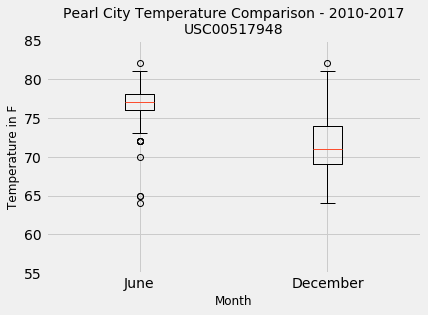

Summary Statistics


(count    148.000000
 mean      76.655405
 std        2.851692
 min       64.000000
 25%       76.000000
 50%       77.000000
 75%       78.000000
 max       82.000000
 Name: temp, dtype: float64, count    109.000000
 mean      71.834862
 std        3.494741
 min       64.000000
 25%       69.000000
 50%       71.000000
 75%       74.000000
 max       82.000000
 Name: temp, dtype: float64)

In [142]:
# Create the box-and-whisker plot for comparison of Pearl City temps.
x_labels = ["June", "December"]
data_4 = [june_4_temp, dec_4_temp]
fig, ax = plt.subplots()
ax.boxplot(data_4, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Pearl City Temperature Comparison - 2010-2017\nUSC00517948',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp4.png")
plt.show()
print("Summary Statistics")
june_4_temp.describe(), dec_4_temp.describe()

In [143]:
june_5_temp=june_USC00518838['temp']

In [144]:
dec_5_temp=dec_USC00518838['temp']

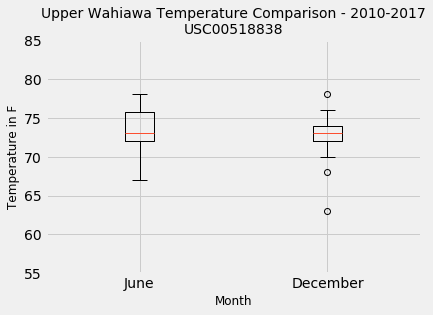

Summary Statistics


(count    38.000000
 mean     73.394737
 std       2.706743
 min      67.000000
 25%      72.000000
 50%      73.000000
 75%      75.750000
 max      78.000000
 Name: temp, dtype: float64, count    19.000000
 mean     72.421053
 std       3.132549
 min      63.000000
 25%      72.000000
 50%      73.000000
 75%      74.000000
 max      78.000000
 Name: temp, dtype: float64)

In [145]:
# Create the box-and-whisker plot for comparison of Upper Wahiawa temps.
x_labels = ["June", "December"]
data_5 = [june_5_temp, dec_5_temp]
fig, ax = plt.subplots()
ax.boxplot(data_5, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Upper Wahiawa Temperature Comparison - 2010-2017\nUSC00518838',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp5.png")
plt.show()
print("Summary Statistics")
june_5_temp.describe(), dec_5_temp.describe()

In [146]:
june_6_temp=june_USC00519281['temp']

In [147]:
dec_6_temp=dec_USC00519281['temp']

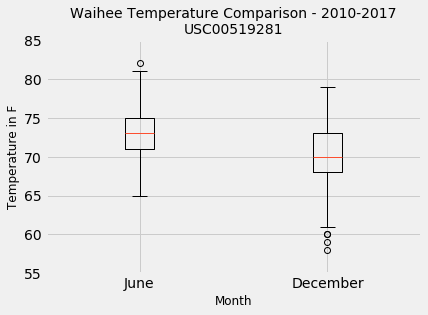

Summary Statistics


(count    236.000000
 mean      73.271186
 std        2.989801
 min       65.000000
 25%       71.000000
 50%       73.000000
 75%       75.000000
 max       82.000000
 Name: temp, dtype: float64, count    217.000000
 mean      69.903226
 std        3.803609
 min       58.000000
 25%       68.000000
 50%       70.000000
 75%       73.000000
 max       79.000000
 Name: temp, dtype: float64)

In [148]:
# Create the box-and-whisker plot for comparison of Waihee temps.
x_labels = ["June", "December"]
data_6 = [june_6_temp, dec_6_temp]
fig, ax = plt.subplots()
ax.boxplot(data_6, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Waihee Temperature Comparison - 2010-2017\nUSC00519281',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp6.png")
plt.show()
print("Summary Statistics")
june_6_temp.describe(), dec_6_temp.describe()

In [149]:
june_7_temp=june_USC00519397['temp']

In [150]:
dec_7_temp=dec_USC00519397['temp']

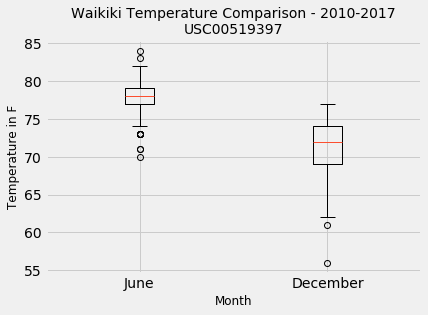

Summary Statistics


(count    236.000000
 mean      77.559322
 std        1.819714
 min       70.000000
 25%       77.000000
 50%       78.000000
 75%       79.000000
 max       84.000000
 Name: temp, dtype: float64, count    210.000000
 mean      71.109524
 std        3.554417
 min       56.000000
 25%       69.000000
 50%       72.000000
 75%       74.000000
 max       77.000000
 Name: temp, dtype: float64)

In [151]:
# Create the box-and-whisker plot for comparison of Waimanalo temps.
x_labels = ["June", "December"]
data_7 = [june_7_temp, dec_7_temp]
fig, ax = plt.subplots()
ax.boxplot(data_7, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Waikiki Temperature Comparison - 2010-2017\nUSC00519397',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp7.png")
plt.show()
print("Summary Statistics")
june_7_temp.describe(), dec_7_temp.describe()

In [152]:
june_8_temp=june_USC00519523['temp']

In [153]:
dec_8_temp=dec_USC00519523['temp']

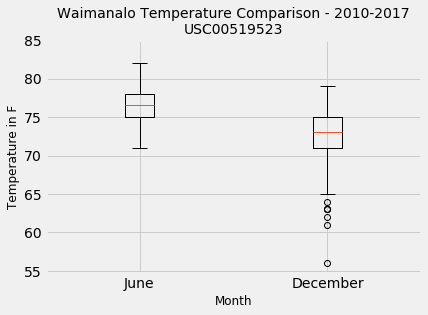

Summary Statistics


(count    232.000000
 mean      76.668103
 std        2.303248
 min       71.000000
 25%       75.000000
 50%       76.500000
 75%       78.000000
 max       82.000000
 Name: temp, dtype: float64, count    210.000000
 mean      72.433333
 std        3.624456
 min       56.000000
 25%       71.000000
 50%       73.000000
 75%       75.000000
 max       79.000000
 Name: temp, dtype: float64)

In [154]:
# Create the box-and-whisker plot for comparison of Waimanalo temps.
x_labels = ["June", "December"]
data_8 = [june_8_temp, dec_8_temp]
fig, ax = plt.subplots()
ax.boxplot(data_8, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Waimanalo Temperature Comparison - 2010-2017\nUSC00519523',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Temperature in F', fontsize=12)
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid(True)
plt.savefig("jundectemp8.png")
plt.show()
print("Summary Statistics")
june_8_temp.describe(), dec_8_temp.describe()

In [155]:
june_0_rain=june_USC00511918['precipitation']

In [156]:
dec_0_rain=dec_USC00511918['precipitation']

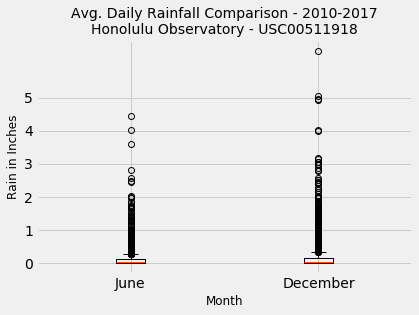

Summary Statistics


(count    159.000000
 mean       0.015157
 std        0.053425
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.010000
 max        0.580000
 Name: precipitation, dtype: float64, count    151.000000
 mean       0.138146
 std        0.551093
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.010000
 max        4.000000
 Name: precipitation, dtype: float64)

In [157]:
# Create the box-and-whisker plot for comparison of all Honolulu Observatory rainfall.
x_labels = ['June', 'December']
rain_0 = [june_0_rain, dec_0_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nHonolulu Observatory - USC00511918',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain0.png")
plt.show()
print("Summary Statistics")
june_0_rain.describe(), dec_0_rain.describe()

In [158]:
june_1_rain=june_USC00513117['precipitation']

In [159]:
dec_1_rain=dec_USC00513117['precipitation']

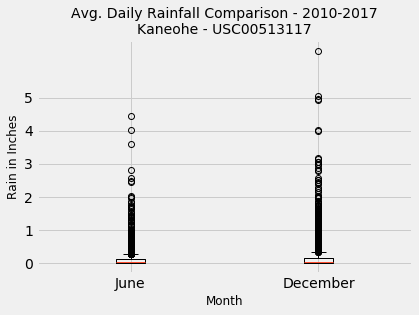

Summary Statistics


(count    234.000000
 mean       0.118248
 std        0.407513
 min        0.000000
 25%        0.000000
 50%        0.030000
 75%        0.100000
 max        4.430000
 Name: precipitation, dtype: float64, count    216.000000
 mean       0.203241
 std        0.518405
 min        0.000000
 25%        0.000000
 50%        0.030000
 75%        0.152500
 max        4.940000
 Name: precipitation, dtype: float64)

In [160]:
# Create the box-and-whisker plot for comparison of Kaneohe rainfall.
x_labels = ['June', 'December']
rain_1 = [june_1_rain, dec_1_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nKaneohe - USC00513117',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain1.png")
plt.show()
print("Summary Statistics")
june_1_rain.describe(), dec_1_rain.describe()

In [161]:
june_2_rain=june_USC00514830['precipitation']

In [162]:
dec_2_rain=dec_USC00514830['precipitation']

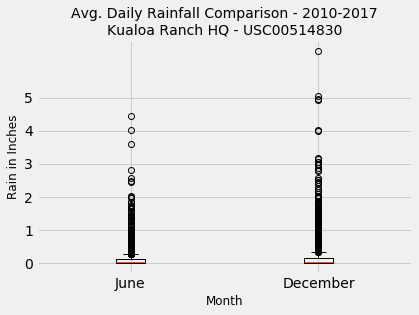

Summary Statistics


(count    167.000000
 mean       0.114192
 std        0.335829
 min        0.000000
 25%        0.000000
 50%        0.030000
 75%        0.120000
 max        3.600000
 Name: precipitation, dtype: float64, count    147.000000
 mean       0.154966
 std        0.370831
 min        0.000000
 25%        0.000000
 50%        0.040000
 75%        0.155000
 max        2.550000
 Name: precipitation, dtype: float64)

In [163]:
# Create the box-and-whisker plot for comparison of Kualoa Ranch HQ rainfall.
x_labels = ['June', 'December']
rain_2 = [june_2_rain, dec_2_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nKualoa Ranch HQ - USC00514830',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain2.png")
plt.show()
print("Summary Statistics")
june_2_rain.describe(), dec_2_rain.describe()

In [164]:
june_3_rain=june_USC00516128['precipitation']

In [165]:
dec_3_rain=dec_USC00516128['precipitation']

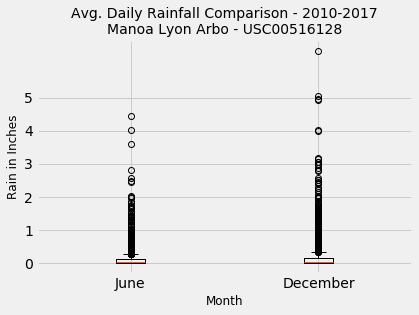

Summary Statistics


(count    214.000000
 mean       0.495748
 std        0.553942
 min        0.000000
 25%        0.090000
 50%        0.295000
 75%        0.740000
 max        2.800000
 Name: precipitation, dtype: float64, count    197.000000
 mean       0.507005
 std        0.825186
 min        0.000000
 25%        0.010000
 50%        0.150000
 75%        0.630000
 max        6.420000
 Name: precipitation, dtype: float64)

In [166]:
# Create the box-and-whisker plot for comparison of Manoa Lyon Arbo rainfall.
x_labels = ['June', 'December']
rain_3 = [june_3_rain, dec_3_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nManoa Lyon Arbo - USC00516128',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain3.png")
plt.show()
print("Summary Statistics")
june_3_rain.describe(), dec_3_rain.describe()

In [167]:
june_4_rain=june_USC00517948['precipitation']

In [168]:
dec_4_rain=dec_USC00517948['precipitation']

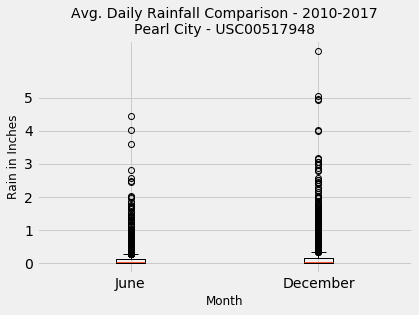

Summary Statistics


(count    79.000000
 mean      0.057975
 std       0.201070
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       0.045000
 max       1.710000
 Name: precipitation, dtype: float64, count    55.000000
 mean      0.152727
 std       0.456531
 min       0.000000
 25%       0.000000
 50%       0.020000
 75%       0.070000
 max       2.800000
 Name: precipitation, dtype: float64)

In [169]:
# Create the box-and-whisker plot for comparison of Pearl City rainfall.
x_labels = ['June', 'December']
rain_4 = [june_4_rain, dec_4_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nPearl City - USC00517948',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain4.png")
plt.show()
print("Summary Statistics")
june_4_rain.describe(), dec_4_rain.describe()

In [170]:
june_5_rain=june_USC00518838['precipitation']

In [171]:
dec_5_rain=june_USC00518838['precipitation']

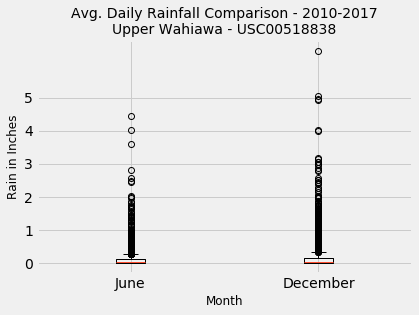

Summary Statistics


(count    26.000000
 mean      0.094615
 std       0.173441
 min       0.000000
 25%       0.000000
 50%       0.035000
 75%       0.087500
 max       0.820000
 Name: precipitation, dtype: float64, count    26.000000
 mean      0.094615
 std       0.173441
 min       0.000000
 25%       0.000000
 50%       0.035000
 75%       0.087500
 max       0.820000
 Name: precipitation, dtype: float64)

In [172]:
# Create the box-and-whisker plot for comparison of Upper Wahiawa rainfall.
x_labels = ['June', 'December']
rain_5 = [june_5_rain, dec_5_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nUpper Wahiawa - USC00518838',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain5.png")
plt.show()
print("Summary Statistics")
june_5_rain.describe(), dec_5_rain.describe()

In [173]:
june_6_rain=june_USC00519281['precipitation']

In [174]:
dec_6_rain=dec_USC00519281['precipitation']

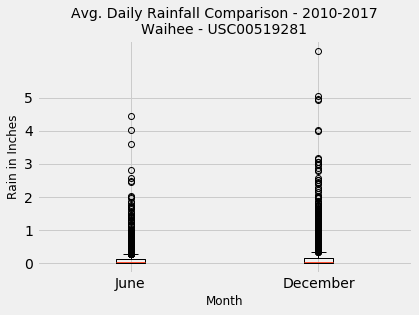

Summary Statistics


(count    236.000000
 mean       0.151525
 std        0.213496
 min        0.000000
 25%        0.010000
 50%        0.060000
 75%        0.212500
 max        1.390000
 Name: precipitation, dtype: float64, count    217.000000
 mean       0.244931
 std        0.489789
 min        0.000000
 25%        0.010000
 50%        0.070000
 75%        0.230000
 max        3.140000
 Name: precipitation, dtype: float64)

In [175]:
# Create the box-and-whisker plot for comparison of Upper Wahiawa rainfall.
x_labels = ['June', 'December']
rain_6 = [june_6_rain, dec_6_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nWaihee - USC00519281',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain6.png")
plt.show()
print("Summary Statistics")
june_6_rain.describe(), dec_6_rain.describe()

In [176]:
june_7_rain=june_USC00519397['precipitation']

In [177]:
dec_7_rain=dec_USC00519397['precipitation']

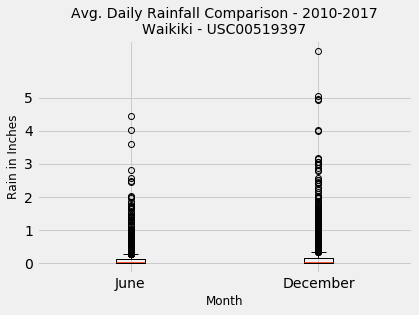

Summary Statistics


(count    233.000000
 mean       0.022661
 std        0.089427
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.010000
 max        0.890000
 Name: precipitation, dtype: float64, count    207.000000
 mean       0.075314
 std        0.242803
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.035000
 max        2.010000
 Name: precipitation, dtype: float64)

In [178]:
# Create the box-and-whisker plot for comparison of Upper Wahiawa rainfall.
x_labels = ['June', 'December']
rain_7 = [june_7_rain, dec_7_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nWaikiki - USC00519397',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain7.png")
plt.show()
print("Summary Statistics")
june_7_rain.describe(), dec_7_rain.describe()

In [179]:
june_8_rain=june_USC00519523['precipitation']

In [180]:
dec_8_rain=dec_USC00519523['precipitation']

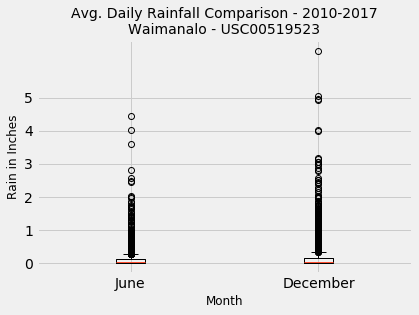

Summary Statistics


(count    226.000000
 mean       0.050044
 std        0.098610
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.067500
 max        0.510000
 Name: precipitation, dtype: float64, count    204.000000
 mean       0.162010
 std        0.483051
 min        0.000000
 25%        0.000000
 50%        0.030000
 75%        0.102500
 max        4.950000
 Name: precipitation, dtype: float64)

In [181]:
# Create the box-and-whisker plot for comparison of Upper Wahiawa rainfall.
x_labels = ['June', 'December']
rain_8 = [june_8_rain, dec_8_rain]
fig, ax = plt.subplots()
ax.boxplot(rain_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Avg. Daily Rainfall Comparison - 2010-2017\nWaimanalo - USC00519523',fontsize=14)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Rain in Inches', fontsize=12)
ax.set_yticks(np.arange(0, 6, step=1.0))
ax.grid(True)
plt.savefig("jundecrain8.png")
plt.show()
print("Summary Statistics")
june_8_rain.describe(), dec_8_rain.describe()

In [182]:
rain_in_june = june_0_rain.mean(), june_1_rain.mean(), june_2_rain.mean(), june_3_rain.mean(), june_4_rain.mean(), june_5_rain.mean(), june_6_rain.mean(), june_7_rain.mean(), june_8_rain.mean()

In [183]:
rain_in_dec = dec_0_rain.mean(), dec_1_rain.mean(), dec_2_rain.mean(), dec_3_rain.mean(), dec_4_rain.mean(), dec_5_rain.mean(), dec_6_rain.mean(), dec_7_rain.mean(), dec_8_rain.mean()

In [184]:
rained_df = pd.DataFrame(rain_in_dec, rain_in_june)
rained_df

0
0.015157  0.138146
0.118248  0.203241
0.114192  0.154966
0.495748  0.507005
0.057975  0.152727
0.094615  0.094615
0.151525  0.244931
0.022661  0.075314
0.050044  0.162010

In [185]:
rained_df.dtypes

0    float64
dtype: object

In [186]:
stations=['USC00511918', 'USC00513117', 'USC00514830', 'USC00516128', 'USC00517948', 'USC00518838', 'USC00519281', 'USC00519397', 'USC00519523']

In [187]:
rained_df['station']=stations
rained_df

0      station
0.015157  0.138146  USC00511918
0.118248  0.203241  USC00513117
0.114192  0.154966  USC00514830
0.495748  0.507005  USC00516128
0.057975  0.152727  USC00517948
0.094615  0.094615  USC00518838
0.151525  0.244931  USC00519281
0.022661  0.075314  USC00519397
0.050044  0.162010  USC00519523

In [188]:
rained_df.reset_index()

index         0      station
0  0.015157  0.138146  USC00511918
1  0.118248  0.203241  USC00513117
2  0.114192  0.154966  USC00514830
3  0.495748  0.507005  USC00516128
4  0.057975  0.152727  USC00517948
5  0.094615  0.094615  USC00518838
6  0.151525  0.244931  USC00519281
7  0.022661  0.075314  USC00519397
8  0.050044  0.162010  USC00519523

In [189]:
rainy_df=rained_df
rainy_df

0      station
0.015157  0.138146  USC00511918
0.118248  0.203241  USC00513117
0.114192  0.154966  USC00514830
0.495748  0.507005  USC00516128
0.057975  0.152727  USC00517948
0.094615  0.094615  USC00518838
0.151525  0.244931  USC00519281
0.022661  0.075314  USC00519397
0.050044  0.162010  USC00519523

In [190]:
rainy_df.reset_index(inplace=True)
rainy_df

index         0      station
0  0.015157  0.138146  USC00511918
1  0.118248  0.203241  USC00513117
2  0.114192  0.154966  USC00514830
3  0.495748  0.507005  USC00516128
4  0.057975  0.152727  USC00517948
5  0.094615  0.094615  USC00518838
6  0.151525  0.244931  USC00519281
7  0.022661  0.075314  USC00519397
8  0.050044  0.162010  USC00519523

In [191]:
rainy_df.columns=['June', 'December', 'Station']
rainy_df

June  December      Station
0  0.015157  0.138146  USC00511918
1  0.118248  0.203241  USC00513117
2  0.114192  0.154966  USC00514830
3  0.495748  0.507005  USC00516128
4  0.057975  0.152727  USC00517948
5  0.094615  0.094615  USC00518838
6  0.151525  0.244931  USC00519281
7  0.022661  0.075314  USC00519397
8  0.050044  0.162010  USC00519523

In [192]:
rainy_df.set_index(['Station'], inplace=True)
rainy_df

June  December
Station                        
USC00511918  0.015157  0.138146
USC00513117  0.118248  0.203241
USC00514830  0.114192  0.154966
USC00516128  0.495748  0.507005
USC00517948  0.057975  0.152727
USC00518838  0.094615  0.094615
USC00519281  0.151525  0.244931
USC00519397  0.022661  0.075314
USC00519523  0.050044  0.162010

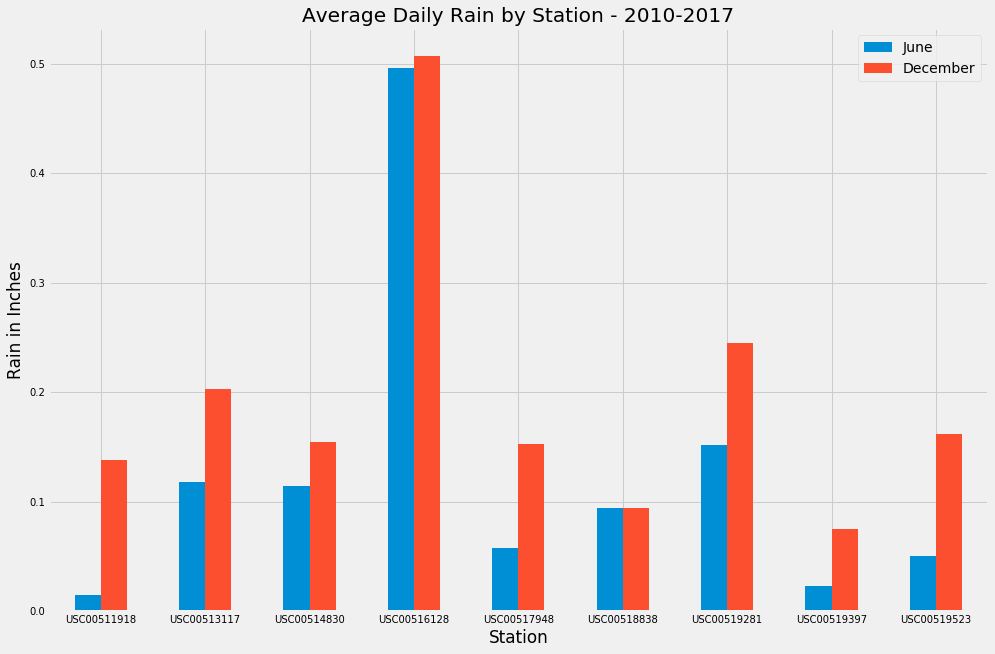

In [193]:
ax = rainy_df[['June', 'December']].plot(kind='bar', title = "Average Daily Rain by Station - 2010-2017", figsize=(15, 10), legend=True, fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Station')
plt.ylabel('Rain in Inches')
plt.savefig("jundecrainbystation.png")

In [194]:
temp_in_june = [june_0_temp.mean(), june_1_temp.mean(), june_2_temp.mean(), june_3_temp.mean(), june_4_temp.mean(), june_5_temp.mean(), june_6_temp.mean(), june_7_temp.mean(), june_8_temp.mean()]

In [195]:
temp_in_dec = [dec_0_temp.mean(), dec_1_temp.mean(), dec_2_temp.mean(), dec_3_temp.mean(), dec_4_temp.mean(), dec_5_temp.mean(), dec_6_temp.mean(), dec_7_temp.mean(), dec_8_temp.mean()]

In [196]:
sun_df = pd.DataFrame(temp_in_dec, temp_in_june)
sun_df

0
74.139394  69.684211
74.050847  71.069444
76.005376  73.224719
71.937220  69.291262
76.655405  71.834862
73.394737  72.421053
73.271186  69.903226
77.559322  71.109524
76.668103  72.433333

In [197]:
sun_df['station']=stations
sun_df

0      station
74.139394  69.684211  USC00511918
74.050847  71.069444  USC00513117
76.005376  73.224719  USC00514830
71.937220  69.291262  USC00516128
76.655405  71.834862  USC00517948
73.394737  72.421053  USC00518838
73.271186  69.903226  USC00519281
77.559322  71.109524  USC00519397
76.668103  72.433333  USC00519523

In [198]:
sun_df.reset_index(inplace=True)
sun_df

index          0      station
0  74.139394  69.684211  USC00511918
1  74.050847  71.069444  USC00513117
2  76.005376  73.224719  USC00514830
3  71.937220  69.291262  USC00516128
4  76.655405  71.834862  USC00517948
5  73.394737  72.421053  USC00518838
6  73.271186  69.903226  USC00519281
7  77.559322  71.109524  USC00519397
8  76.668103  72.433333  USC00519523

In [199]:
sun_df.columns=['June', 'December', 'Station']
sun_df

June   December      Station
0  74.139394  69.684211  USC00511918
1  74.050847  71.069444  USC00513117
2  76.005376  73.224719  USC00514830
3  71.937220  69.291262  USC00516128
4  76.655405  71.834862  USC00517948
5  73.394737  72.421053  USC00518838
6  73.271186  69.903226  USC00519281
7  77.559322  71.109524  USC00519397
8  76.668103  72.433333  USC00519523

In [200]:
sun_df.set_index(['Station'], inplace=True)
sun_df

June   December
Station                          
USC00511918  74.139394  69.684211
USC00513117  74.050847  71.069444
USC00514830  76.005376  73.224719
USC00516128  71.937220  69.291262
USC00517948  76.655405  71.834862
USC00518838  73.394737  72.421053
USC00519281  73.271186  69.903226
USC00519397  77.559322  71.109524
USC00519523  76.668103  72.433333

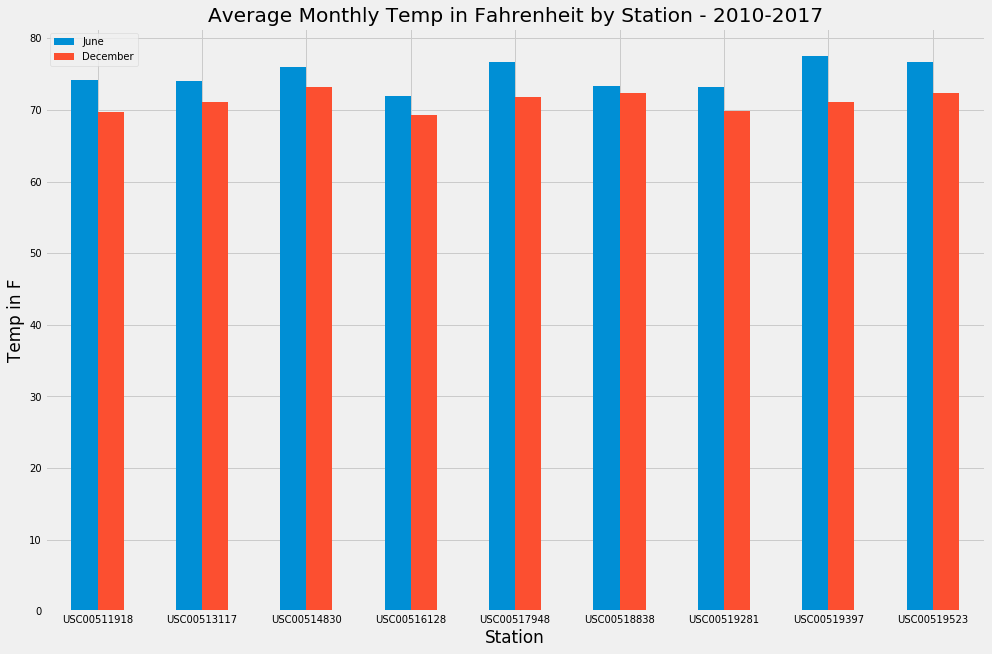

In [201]:
ax = sun_df[['June', 'December']].plot(kind='bar', title = "Average Monthly Temp in Fahrenheit by Station - 2010-2017", figsize=(15, 10), legend=True, fontsize=10)
plt.legend(loc="upper left", fontsize='10')
plt.xticks(rotation=0)
plt.xlabel('Station')
plt.ylabel('Temp in F')
plt.savefig("jundectempbystation.png")

In [ ]:
#An objective laid down is to study the weather patterns for the months of June and December.  
#I have used the describe function to list all of the essential weather data for the group of stations 
#as a whole and then for each station individually.  Average temperatures were nearly 4 degrees higher in June 
#than in December and average daily rainfall was more than 50% greater in December than in June.
#
#Box and whisker plots were prepared to look at the temperature and rainfall data for each station and bar charts 
#were produced listing June and December data, side by side, for daily average temperatures and rainfall.  This 
#helps identify warmest locations and those with lower amounts of rainfall, which would elevate a site’s potential 
#for a surf and ice cream shop.
#
#Additional research that needs to be done includes collecting data on surfing conditions and demographic information.  
#Also, a SWOT marketing analysis should be prepared for each location, looking at strengths, opportunities, weaknesses, 
#and threats.  A PDF with the key graphics has been prepared and deposited in the repository.
